# Team_Project

In [1]:
setwd('d:/workspace/R_practice/data/R_data')

In [2]:
getwd()

[1] "d:/workspace/R_practice/data/R_data"

In [3]:
library('dplyr')
library('ggplot2')
library('car')
# library('corrplot')


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode



In [4]:
# install.packages('corrplot')

In [5]:
data = read.csv('sales_data_1.csv')
head(data)

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
1,200901,과즙음료,45,990,2611,4,126753,151,12
2,200902,과즙음료,45,1199,2689,9,113399,3014,8
3,200903,과즙음료,43,1102,2735,12,129162,1383,9
4,200904,과즙음료,42,1326,2807,19,126277,3564,8
5,200905,과즙음료,46,1672,2674,25,129584,9288,12
6,200906,과즙음료,48,1875,2777,27,123218,9998,8


In [6]:
fruit_data = data %>%
                filter(CATEGORY == '과즙음료')
vitamin_data = data %>%
                filter(CATEGORY == '비타민음료')
tea_data = data %>%
            filter(CATEGORY == '차음료')
head(fruit_data)

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
1,200901,과즙음료,45,990,2611,4,126753,151,12
2,200902,과즙음료,45,1199,2689,9,113399,3014,8
3,200903,과즙음료,43,1102,2735,12,129162,1383,9
4,200904,과즙음료,42,1326,2807,19,126277,3564,8
5,200905,과즙음료,46,1672,2674,25,129584,9288,12
6,200906,과즙음료,48,1875,2777,27,123218,9998,8


In [7]:
a = cor(fruit_data[,c(4:10)])

In [8]:
# corrplot(a, method="number", col = rainbow(1000))

In [9]:
b = cor(vitamin_data[,c(4:10)])

In [10]:
b

,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
ITEM_CNT,1.00000000,0.7515737,0.85768871,0.0657196895,0.94217720,0.25896488,0.1358020307
QTY,0.75157371,1.0000000,0.72105041,0.3615501216,0.71192476,0.51181463,0.1201901927
PRICE,0.85768871,0.7210504,1.00000000,-0.0447921578,0.82446317,0.20432138,0.1188034038
MAXTEMP,0.06571969,0.3615501,-0.04479216,1.0000000000,0.02615313,0.67485293,-0.0007330759
SALEDAY,0.94217720,0.7119248,0.82446317,0.0261531274,1.00000000,0.21351983,0.1509168646
RAIN_DAY,0.25896488,0.5118146,0.20432138,0.6748529252,0.21351983,1.00000000,-0.0513513553
HOLIDAY,0.13580203,0.1201902,0.11880340,-0.0007330759,0.15091686,-0.05135136,1.0000000000


In [11]:
# corrplot(b, method="number", col = rainbow(1000))

In [12]:
c = cor(tea_data[,c(4:10)])

In [13]:
# corrplot(c, method="number", col = rainbow(1000))

In [14]:
library('leaps')

Warning message:
"package 'leaps' was built under R version 3.6.3"

## 과즙 음료 모델 정의 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [15]:
leaps = regsubsets(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY, data = fruit_data, nbest = 5)
summary(leaps)

Subset selection object
Call: regsubsets.formula(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + 
    RAIN_DAY + HOLIDAY, data = fruit_data, nbest = 5)
7 Variables  (and intercept)
         Forced in Forced out
YM           FALSE      FALSE
ITEM_CNT     FALSE      FALSE
PRICE        FALSE      FALSE
MAXTEMP      FALSE      FALSE
SALEDAY      FALSE      FALSE
RAIN_DAY     FALSE      FALSE
HOLIDAY      FALSE      FALSE
5 subsets of each size up to 7
Selection Algorithm: exhaustive
         YM  ITEM_CNT PRICE MAXTEMP SALEDAY RAIN_DAY HOLIDAY
1  ( 1 ) " " " "      " "   "*"     " "     " "      " "    
1  ( 2 ) " " "*"      " "   " "     " "     " "      " "    
1  ( 3 ) " " " "      " "   " "     "*"     " "      " "    
1  ( 4 ) "*" " "      " "   " "     " "     " "      " "    
1  ( 5 ) " " " "      " "   " "     " "     "*"      " "    
2  ( 1 ) " " "*"      " "   "*"     " "     " "      " "    
2  ( 2 ) "*" " "      " "   "*"     " "     " "      " "    
2  ( 3 ) " " " "      " " 

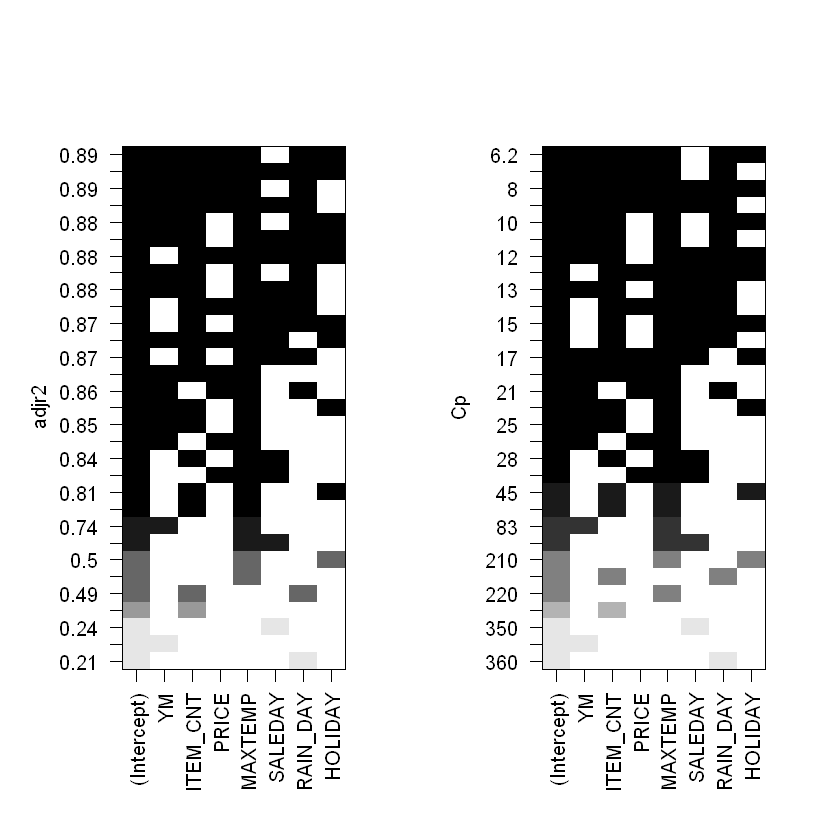

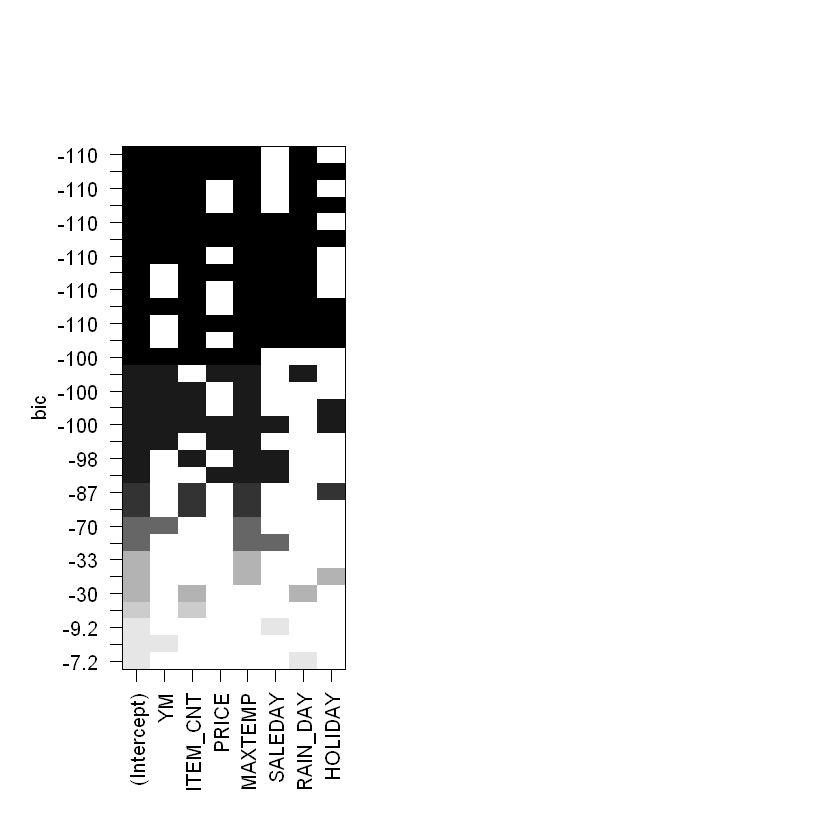

In [16]:
par(mfrow = c(1, 2))
plot(leaps, scale = 'adjr2')
plot(leaps, scale = 'Cp')
plot(leaps, scale = 'bic')

In [17]:
# SALEDAY 빠짐
a = lm(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY + HOLIDAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY + 
    HOLIDAY, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-492.97 -123.46   -6.15   93.01  576.50 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.265e+05  7.923e+04  -5.383 1.70e-06 ***
YM           2.115e+00  3.938e-01   5.370 1.78e-06 ***
ITEM_CNT     1.911e+01  4.685e+00   4.080 0.000152 ***
PRICE        3.210e-01  1.326e-01   2.421 0.018953 *  
MAXTEMP      5.457e+01  3.878e+00  14.073  < 2e-16 ***
RAIN_DAY    -1.293e-02  3.772e-03  -3.429 0.001181 ** 
HOLIDAY      4.013e+01  2.315e+01   1.733 0.088824 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 206.3 on 53 degrees of freedom
Multiple R-squared:  0.9037,	Adjusted R-squared:  0.8928 
F-statistic: 82.94 on 6 and 53 DF,  p-value: < 2.2e-16


In [18]:
vif(a)

YM ITEM_CNT    PRICE  MAXTEMP RAIN_DAY  HOLIDAY 
4.373501 2.902500 3.150894 1.979835 2.064419 1.044786

In [19]:
# PRICE 빠짐
a = lm(QTY ~ YM + ITEM_CNT + MAXTEMP + RAIN_DAY + HOLIDAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + MAXTEMP + RAIN_DAY + HOLIDAY, 
    data = fruit_data)

Residuals:
   Min     1Q Median     3Q    Max 
-414.3 -128.5   15.8   86.6  606.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.721e+05  4.907e+04  -5.546 9.02e-07 ***
YM           1.349e+00  2.447e-01   5.511 1.02e-06 ***
ITEM_CNT     2.712e+01  3.464e+00   7.830 1.86e-10 ***
MAXTEMP      5.332e+01  4.012e+00  13.289  < 2e-16 ***
RAIN_DAY    -1.409e-02  3.907e-03  -3.606 0.000678 ***
HOLIDAY      4.162e+01  2.416e+01   1.723 0.090659 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 215.4 on 54 degrees of freedom
Multiple R-squared:  0.8931,	Adjusted R-squared:  0.8832 
F-statistic: 90.23 on 5 and 54 DF,  p-value: < 2.2e-16


In [20]:
vif(a)

YM ITEM_CNT  MAXTEMP RAIN_DAY  HOLIDAY 
1.549902 1.455614 1.944580 2.031359 1.044045

In [21]:
# RAIN_DAY 빠짐
a = lm(QTY ~ YM + ITEM_CNT + MAXTEMP + HOLIDAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + MAXTEMP + HOLIDAY, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-497.98 -144.79    9.68   94.97  724.57 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.316e+05  5.272e+04  -4.393 5.14e-05 ***
YM           1.147e+00  2.630e-01   4.362 5.70e-05 ***
ITEM_CNT     2.650e+01  3.818e+00   6.941 4.72e-09 ***
MAXTEMP      4.334e+01  3.207e+00  13.514  < 2e-16 ***
HOLIDAY      5.141e+01  2.650e+01   1.940   0.0575 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 237.8 on 55 degrees of freedom
Multiple R-squared:  0.8674,	Adjusted R-squared:  0.8577 
F-statistic: 89.91 on 4 and 55 DF,  p-value: < 2.2e-16


In [22]:
vif(a)

YM ITEM_CNT  MAXTEMP  HOLIDAY 
1.469104 1.452036 1.019851 1.030869

In [23]:
cor.test(fruit_data$YM, fruit_data$QTY)


	Pearson's product-moment correlation

data:  fruit_data$YM and fruit_data$QTY
t = 4.1858, df = 58, p-value = 9.765e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2594775 0.6554277
sample estimates:
      cor 
0.4816663 


In [24]:
# HOLIDAY 빠짐
a = lm(QTY ~ YM + ITEM_CNT + MAXTEMP, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + MAXTEMP, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-449.27 -140.25   -5.38   80.76  752.07 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.488e+05  5.324e+04  -4.674 1.90e-05 ***
YM           1.236e+00  2.654e-01   4.656 2.02e-05 ***
ITEM_CNT     2.583e+01  3.895e+00   6.630 1.41e-08 ***
MAXTEMP      4.344e+01  3.285e+00  13.222  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 243.6 on 56 degrees of freedom
Multiple R-squared:  0.8583,	Adjusted R-squared:  0.8507 
F-statistic:   113 on 3 and 56 DF,  p-value: < 2.2e-16


In [25]:
vif(a)

YM ITEM_CNT  MAXTEMP 
1.425152 1.440001 1.019623

In [118]:
fruit_data_2009

YM,MAXTEMP,QTY
1,4,990
2,9,1199
3,12,1102
4,19,1326
5,25,1672
6,27,1875
7,28,1663
8,29,1957
9,27,2021
10,22,1718


In [167]:
fruit_data_2009_month = fruit_data %>%
                    filter(grepl('^2009', YM))
fruit_data_2009_month$YM = as.factor(seq(1:12))
fruit_data_2009_month$year = 2009

fruit_data_2010_month = fruit_data %>%
                    filter(grepl('^2010', YM))
fruit_data_2010_month$YM = as.factor(seq(1:12))
fruit_data_2010_month$year = 2010

fruit_data_2011_month = fruit_data %>%
                    filter(grepl('^2011', YM))
fruit_data_2011_month$YM = as.factor(seq(1:12))
fruit_data_2011_month$year = 2011

fruit_data_2012_month = fruit_data %>%
                    filter(grepl('^2012', YM))
fruit_data_2012_month$YM = as.factor(seq(1:12))
fruit_data_2012_month$year = 2012

fruit_data_2013_month = fruit_data %>%
                    filter(grepl('^2013', YM))
fruit_data_2013_month$YM = as.factor(seq(1:12))
fruit_data_2013_month$year = 2013


fruit_data_ymonth = rbind(fruit_data_2009_month, fruit_data_2010_month, fruit_data_2011_month, fruit_data_2012_month, fruit_data_2013_month)
fruit_data_ymonth = as.data.frame(fruit_data_ymonth)
head(fruit_data_ymonth)
# fruit_data_ymonth$year = as.factor(fruit_data_ymonth)

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY,year
1,1,과즙음료,45,990,2611,4,126753,151,12,2009
2,2,과즙음료,45,1199,2689,9,113399,3014,8,2009
3,3,과즙음료,43,1102,2735,12,129162,1383,9,2009
4,4,과즙음료,42,1326,2807,19,126277,3564,8,2009
5,5,과즙음료,46,1672,2674,25,129584,9288,12,2009
6,6,과즙음료,48,1875,2777,27,123218,9998,8,2009


In [138]:
a = lm(QTY ~ YM + ITEM_CNT + MAXTEMP, data = fruit_data_ymonth)
summary(a)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + MAXTEMP, data = fruit_data_ymonth)

Residuals:
    Min      1Q  Median      3Q     Max 
-577.39 -172.34  -32.91  175.61  669.71 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1045.315    265.657  -3.935 0.000279 ***
YM2            93.804    213.322   0.440 0.662191    
YM3           319.301    312.926   1.020 0.312888    
YM4           178.860    471.086   0.380 0.705933    
YM5           619.613    665.692   0.931 0.356827    
YM6           398.766    782.586   0.510 0.612803    
YM7            91.194    817.864   0.112 0.911703    
YM8           201.422    853.206   0.236 0.814421    
YM9           356.322    741.893   0.480 0.633299    
YM10          218.141    587.373   0.371 0.712057    
YM11          -91.331    365.493  -0.250 0.803790    
YM12           -6.454    180.898  -0.036 0.971694    
ITEM_CNT       37.455      3.638  10.294  1.6e-13 ***
MAXTEMP        30.825     29.767   1.036 0.305820    
---


In [139]:
vif(a)

,GVIF,Df,GVIF^(1/(2*Df))
YM,78.403957,11,1.219288
ITEM_CNT,1.114295,1,1.055602
MAXTEMP,74.239869,1,8.616256


In [169]:
# 과즙음료 최종 모델
a = lm(QTY ~ YM + ITEM_CNT + year, data = fruit_data_ymonth)
summary(a)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + year, data = fruit_data_ymonth)

Residuals:
    Min      1Q  Median      3Q     Max 
-448.79 -106.10  -24.00   87.32  477.73 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.214e+05  4.744e+04  -4.667 2.66e-05 ***
YM2          2.356e+02  1.365e+02   1.726 0.091061 .  
YM3          5.808e+02  1.366e+02   4.251 0.000103 ***
YM4          6.510e+02  1.366e+02   4.765 1.93e-05 ***
YM5          1.315e+03  1.369e+02   9.606 1.44e-12 ***
YM6          1.230e+03  1.373e+02   8.954 1.21e-11 ***
YM7          9.630e+02  1.375e+02   7.005 8.97e-09 ***
YM8          1.114e+03  1.377e+02   8.094 2.15e-10 ***
YM9          1.144e+03  1.373e+02   8.331 9.66e-11 ***
YM10         8.533e+02  1.380e+02   6.185 1.53e-07 ***
YM11         3.032e+02  1.383e+02   2.193 0.033425 *  
YM12         1.172e+02  1.377e+02   0.852 0.398875    
ITEM_CNT     2.752e+01  3.567e+00   7.714 7.84e-10 ***
year         1.099e+02  2.365e+01   4.647 2.84e

In [154]:
vif(a)

,GVIF,Df,GVIF^(1/(2*Df))
YM,1.097362,11,1.004232
ITEM_CNT,1.538035,1,1.240176
year,1.440673,1,1.200280


In [143]:
a = lm(QTY ~ YM + ITEM_CNT, data = fruit_data_ymonth)
summary(a)


Call:
lm(formula = QTY ~ YM + ITEM_CNT, data = fruit_data_ymonth)

Residuals:
   Min     1Q Median     3Q    Max 
-553.2 -164.7  -53.9  178.4  659.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -937.069    244.416  -3.834 0.000374 ***
YM2          235.600    163.703   1.439 0.156723    
YM3          595.493    163.802   3.635 0.000686 ***
YM4          636.307    163.802   3.885 0.000320 ***
YM5         1287.750    164.052   7.850 4.27e-10 ***
YM6         1191.130    164.386   7.246 3.47e-09 ***
YM7          920.857    164.522   5.597 1.09e-06 ***
YM8         1068.384    164.670   6.488 4.90e-08 ***
YM9         1105.530    164.386   6.725 2.14e-08 ***
YM10         801.974    164.915   4.863 1.34e-05 ***
YM11         246.364    165.188   1.491 0.142534    
YM12          71.384    164.670   0.433 0.666638    
ITEM_CNT      36.683      3.564  10.293 1.25e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error:

In [125]:
bartlett.test(fruit_month$QTY, fruit_month$YM)


	Bartlett test of homogeneity of variances

data:  fruit_month$QTY and fruit_month$YM
Bartlett's K-squared = 10.125, df = 11, p-value = 0.5192


In [126]:
a = aov(QTY ~ YM, data = fruit_month)
summary(a)

            Df   Sum Sq Mean Sq F value   Pr(>F)    
YM          11 13195559 1199596    5.62 1.04e-05 ***
Residuals   48 10246402  213467                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [127]:
TukeyHSD(a)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = QTY ~ YM, data = fruit_month)

$YM
         diff          lwr         upr     p adj
2-1     235.6  -767.770603 1238.970603 0.9995737
3-1     536.8  -466.570603 1540.170603 0.7897165
4-1     695.0  -308.370603 1698.370603 0.4393635
5-1    1397.8   394.429397 2401.170603 0.0009295
6-1    1345.2   341.829397 2348.570603 0.0016576
7-1    1089.6    86.229397 2092.970603 0.0227689
8-1    1251.8   248.429397 2255.170603 0.0044991
9-1    1259.6   256.229397 2262.970603 0.0041457
10-1   1007.4     4.029397 2010.770603 0.0482624
11-1    473.8  -529.570603 1477.170603 0.8925092
12-1    254.8  -748.570603 1258.170603 0.9991165
3-2     301.2  -702.170603 1304.570603 0.9961022
4-2     459.4  -543.970603 1462.770603 0.9106090
5-2    1162.2   158.829397 2165.570603 0.0112443
6-2    1109.6   106.229397 2112.970603 0.0188154
7-2     854.0  -149.370603 1857.370603 0.1656001
8-2    1016.2    12.829397 2019.57060

In [26]:
cor.test(fruit_data$ITEM_CNT, fruit_data$QTY)


	Pearson's product-moment correlation

data:  fruit_data$ITEM_CNT and fruit_data$QTY
t = 6.0358, df = 58, p-value = 1.189e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4359612 0.7558404
sample estimates:
      cor 
0.6211264 


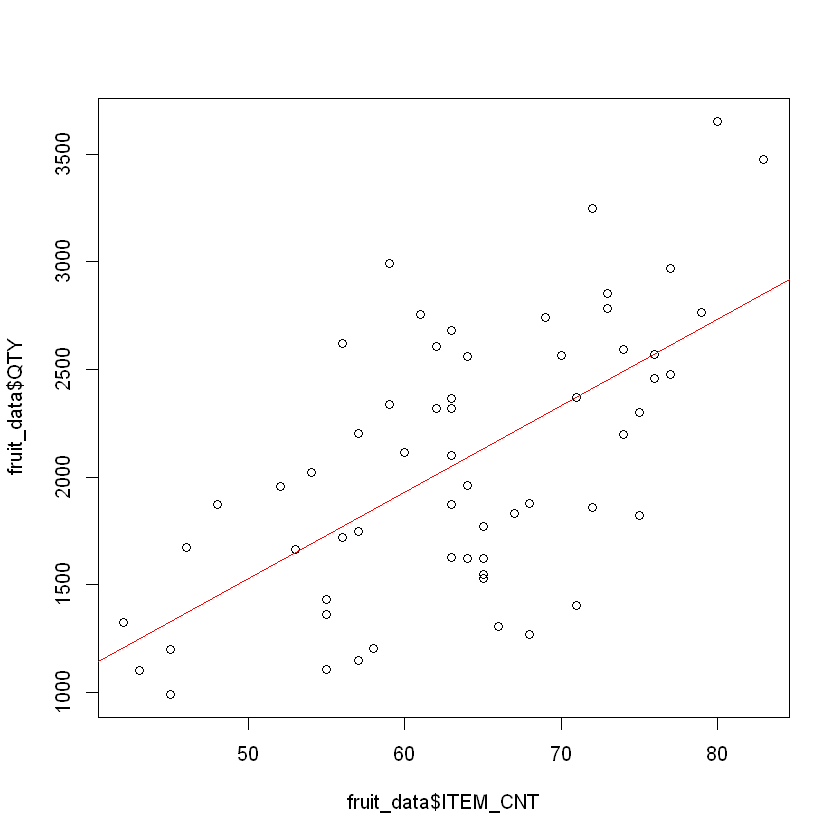

In [27]:
a = lm(QTY ~ ITEM_CNT, data = fruit_data)
plot(fruit_data$ITEM_CNT, fruit_data$QTY)
abline(a, col = 2)

## ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [28]:
cor(fruit_data$PRICE, fruit_data$QTY)

[1] -0.09838038

In [29]:
a = lm(QTY ~ PRICE, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ PRICE, data = fruit_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1089.35  -483.42   -47.06   430.13  1665.92 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2529.6461   610.3934   4.144 0.000112 ***
PRICE         -0.1725     0.2291  -0.753 0.454558    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 632.7 on 58 degrees of freedom
Multiple R-squared:  0.009679,	Adjusted R-squared:  -0.007396 
F-statistic: 0.5669 on 1 and 58 DF,  p-value: 0.4546


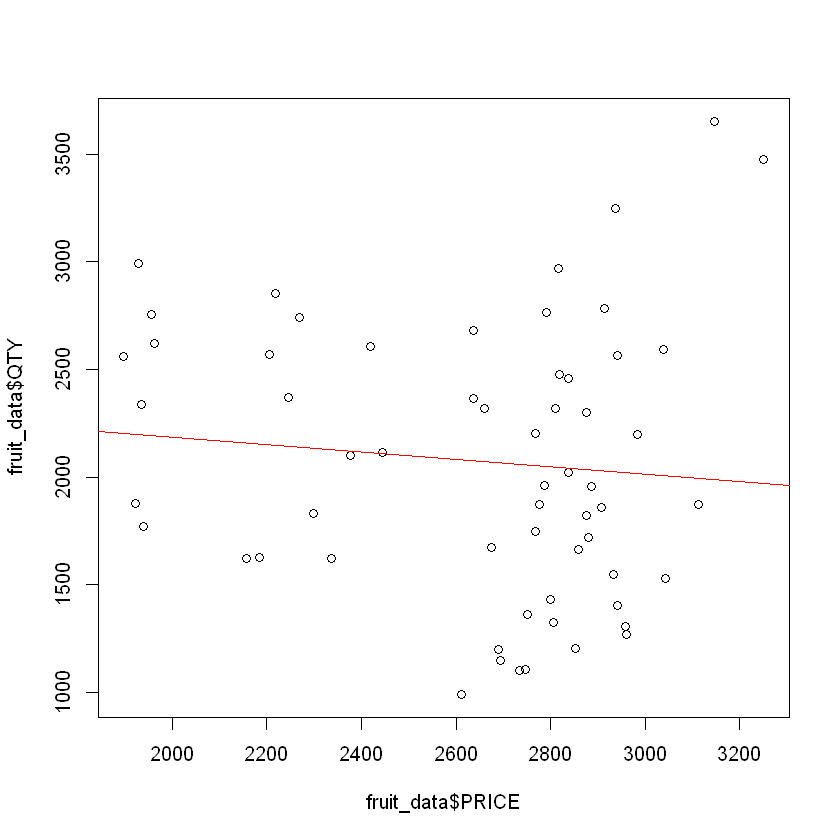

In [30]:
plot(fruit_data$PRICE, fruit_data$QTY)
abline(a, col = 2)

In [31]:
a = lm(QTY ~ ITEM_CNT + MAXTEMP + RAIN_DAY + HOLIDAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP + RAIN_DAY + HOLIDAY, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-559.08 -172.49   11.84  146.27  556.08 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.689e+03  3.637e+02  -4.644 2.17e-05 ***
ITEM_CNT     3.713e+01  3.652e+00  10.168 3.06e-14 ***
MAXTEMP      4.838e+01  4.844e+00   9.987 5.85e-14 ***
RAIN_DAY    -9.173e-03  4.711e-03  -1.947   0.0566 .  
HOLIDAY      6.732e+01  2.936e+01   2.293   0.0257 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 266.8 on 55 degrees of freedom
Multiple R-squared:  0.833,	Adjusted R-squared:  0.8208 
F-statistic: 68.57 on 4 and 55 DF,  p-value: < 2.2e-16


In [32]:
cor(fruit_data$RAIN_DAY, fruit_data$QTY)

[1] 0.4756766

In [33]:
a = lm(QTY ~ RAIN_DAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ RAIN_DAY, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-815.94 -441.85   -1.32  263.85 1790.09 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.802e+03  9.796e+01  18.390  < 2e-16 ***
RAIN_DAY    2.930e-02  7.115e-03   4.118 0.000123 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 559.2 on 58 degrees of freedom
Multiple R-squared:  0.2263,	Adjusted R-squared:  0.2129 
F-statistic: 16.96 on 1 and 58 DF,  p-value: 0.0001225


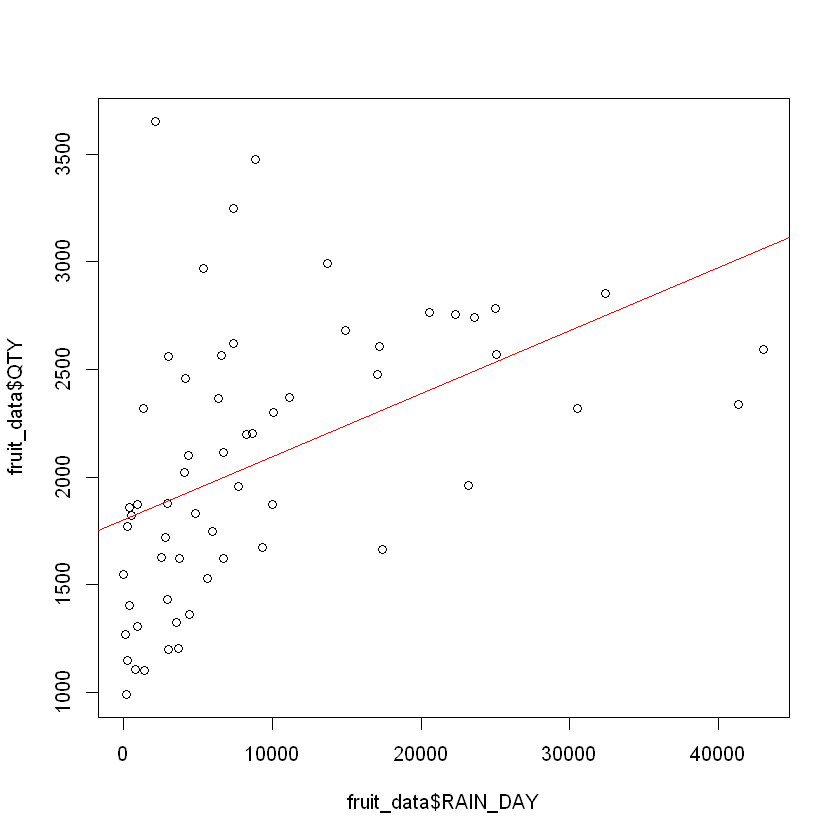

In [34]:
plot(fruit_data$RAIN_DAY, fruit_data$QTY)
abline(a, col = 2)

In [35]:
# 설명력이 0.01수준 달라짐
a = lm(QTY ~ ITEM_CNT + MAXTEMP + HOLIDAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP + HOLIDAY, data = fruit_data)

Residuals:
   Min     1Q Median     3Q    Max 
-631.6 -221.0   13.0  144.6  685.0 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1609.330    370.266  -4.346 5.89e-05 ***
ITEM_CNT       35.682      3.663   9.741 1.17e-13 ***
MAXTEMP        42.030      3.671  11.448 2.72e-16 ***
HOLIDAY        71.405     30.008   2.380   0.0208 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 273.4 on 56 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8119 
F-statistic: 85.88 on 3 and 56 DF,  p-value: < 2.2e-16


In [36]:
bartlett.test(QTY ~ as.factor(HOLIDAY), data = fruit_data)


	Bartlett test of homogeneity of variances

data:  QTY by as.factor(HOLIDAY)
Bartlett's K-squared = 4.7898, df = 4, p-value = 0.3096


In [37]:
a = aov(QTY ~ as.factor(HOLIDAY), data = fruit_data)
summary(a)

                   Df   Sum Sq Mean Sq F value Pr(>F)  
as.factor(HOLIDAY)  4  4900849 1225212   3.634 0.0107 *
Residuals          55 18541111  337111                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [38]:
TukeyHSD(a)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = QTY ~ as.factor(HOLIDAY), data = fruit_data)

$`as.factor(HOLIDAY)`
            diff         lwr        upr     p adj
9-8    163.10317  -420.42361  746.62996 0.9329426
10-8   714.65179   115.38157 1313.92201 0.0117936
11-8    29.08929  -696.66299  754.84156 0.9999619
12-8   143.21429  -785.17115 1071.59972 0.9923413
10-9   551.54861   -11.08969 1114.18691 0.0572624
11-9  -134.01389  -829.82523  561.79746 0.9823274
12-9   -19.88889  -925.06101  885.28323 0.9999965
11-10 -685.56250 -1394.62859   23.50359 0.0627195
12-10 -571.43750 -1486.83788  343.96288 0.4066145
12-11  114.12500  -888.64588 1116.89588 0.9976323


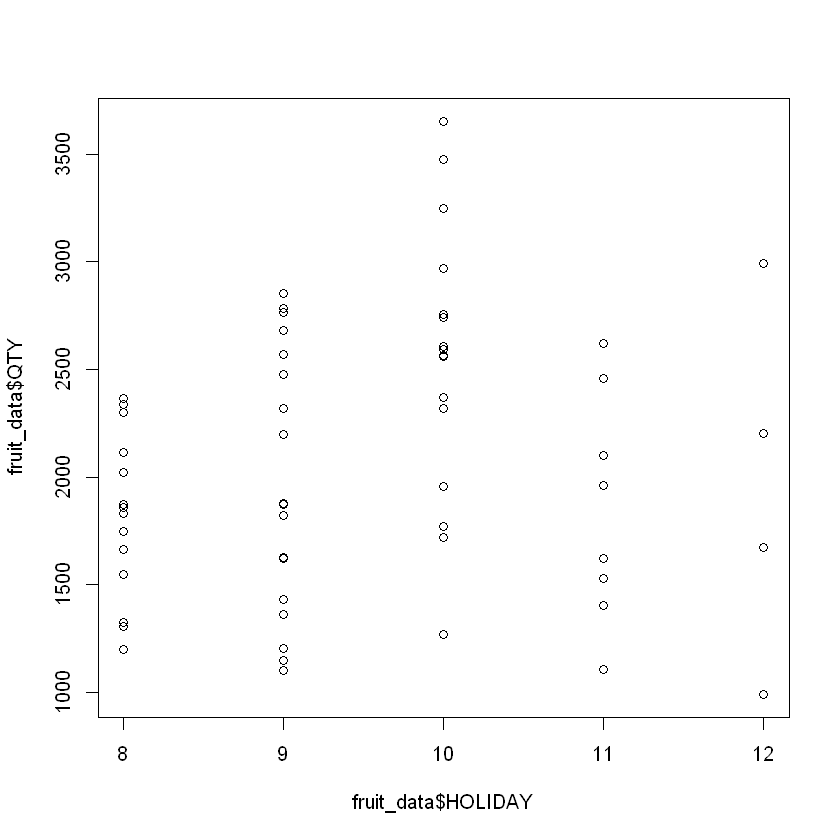

In [39]:
plot(fruit_data$HOLIDAY, fruit_data$QTY)

In [40]:
# 과즙음료 최종 모델
a = lm(QTY ~ ITEM_CNT + MAXTEMP, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-524.38 -163.69  -32.57  162.39  725.28 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -933.680    247.168  -3.778  0.00038 ***
ITEM_CNT      35.727      3.810   9.378 3.76e-13 ***
MAXTEMP       42.019      3.819  11.004 1.01e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 284.3 on 57 degrees of freedom
Multiple R-squared:  0.8034,	Adjusted R-squared:  0.7965 
F-statistic: 116.5 on 2 and 57 DF,  p-value: < 2.2e-16


In [41]:
vif(a)

ITEM_CNT  MAXTEMP 
1.010881 1.010881

### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

### 차음료 모델 정의 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [42]:
leaps = regsubsets(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY, data = tea_data, nbest = 5)
summary(leaps)

Subset selection object
Call: regsubsets.formula(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + 
    RAIN_DAY + HOLIDAY, data = tea_data, nbest = 5)
7 Variables  (and intercept)
         Forced in Forced out
YM           FALSE      FALSE
ITEM_CNT     FALSE      FALSE
PRICE        FALSE      FALSE
MAXTEMP      FALSE      FALSE
SALEDAY      FALSE      FALSE
RAIN_DAY     FALSE      FALSE
HOLIDAY      FALSE      FALSE
5 subsets of each size up to 7
Selection Algorithm: exhaustive
         YM  ITEM_CNT PRICE MAXTEMP SALEDAY RAIN_DAY HOLIDAY
1  ( 1 ) " " " "      " "   "*"     " "     " "      " "    
1  ( 2 ) " " " "      " "   " "     "*"     " "      " "    
1  ( 3 ) "*" " "      " "   " "     " "     " "      " "    
1  ( 4 ) " " "*"      " "   " "     " "     " "      " "    
1  ( 5 ) " " " "      " "   " "     " "     "*"      " "    
2  ( 1 ) " " " "      " "   "*"     "*"     " "      " "    
2  ( 2 ) "*" " "      " "   "*"     " "     " "      " "    
2  ( 3 ) " " " "      "*"   

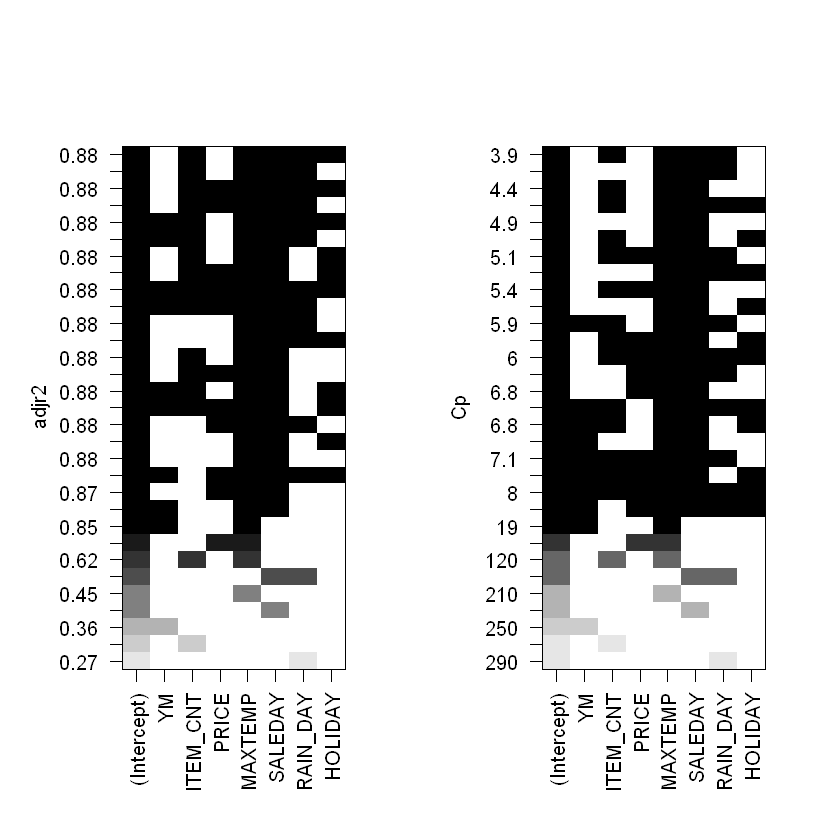

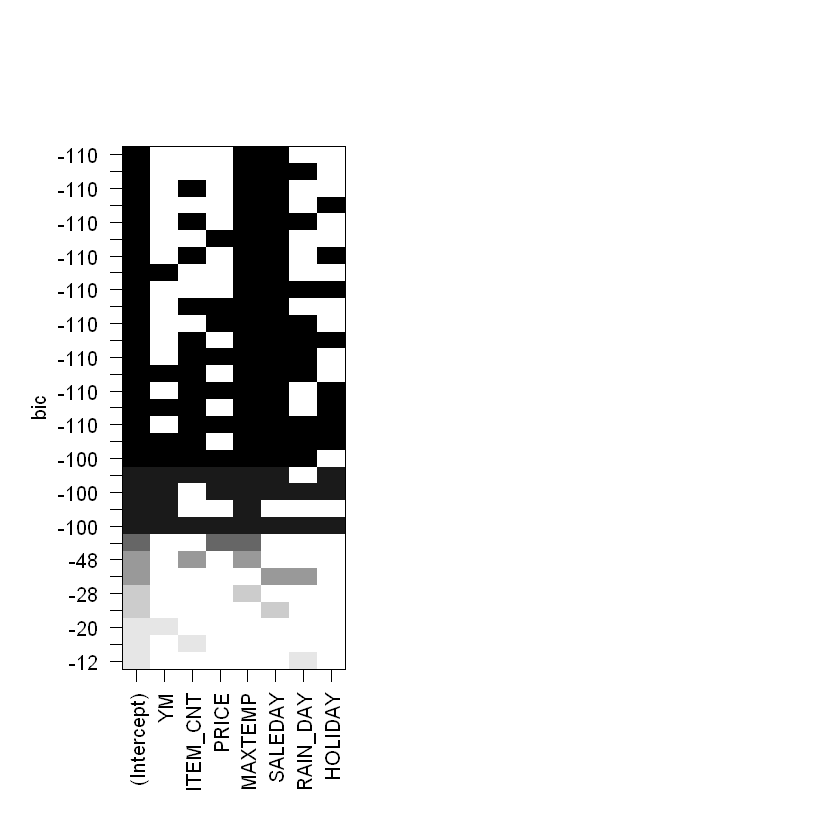

In [43]:
par(mfrow = c(1, 2))
plot(leaps, scale = 'adjr2')
plot(leaps, scale = 'Cp')
plot(leaps, scale = 'bic')

In [155]:
a = lm(QTY ~ ITEM_CNT + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY, data = tea_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP + SALEDAY + RAIN_DAY + 
    HOLIDAY, data = tea_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-469.43 -130.19  -10.38   99.17  843.77 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 201.300255 475.580566   0.423    0.674    
ITEM_CNT    -20.560113  12.503982  -1.644    0.106    
MAXTEMP      49.901120   4.237787  11.775  < 2e-16 ***
SALEDAY       0.011307   0.001016  11.133 1.34e-15 ***
RAIN_DAY     -0.005957   0.004034  -1.477    0.146    
HOLIDAY      26.885867  25.080351   1.072    0.288    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 224.1 on 54 degrees of freedom
Multiple R-squared:  0.8918,	Adjusted R-squared:  0.8818 
F-statistic:    89 on 5 and 54 DF,  p-value: < 2.2e-16


In [156]:
vif(a)

ITEM_CNT  MAXTEMP  SALEDAY RAIN_DAY  HOLIDAY 
2.230313 2.004874 2.192671 2.001774 1.039897

In [157]:
a = lm(QTY ~ ITEM_CNT + MAXTEMP + SALEDAY + RAIN_DAY, data = tea_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP + SALEDAY + RAIN_DAY, data = tea_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-439.01 -153.19  -10.17  111.11  847.70 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 407.001584 435.740293   0.934    0.354    
ITEM_CNT    -19.839826  12.502835  -1.587    0.118    
MAXTEMP      50.176566   4.235722  11.846  < 2e-16 ***
SALEDAY       0.011402   0.001013  11.255 6.84e-16 ***
RAIN_DAY     -0.006452   0.004013  -1.608    0.114    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 224.4 on 55 degrees of freedom
Multiple R-squared:  0.8895,	Adjusted R-squared:  0.8814 
F-statistic: 110.7 on 4 and 55 DF,  p-value: < 2.2e-16


In [158]:
vif(a)

ITEM_CNT  MAXTEMP  SALEDAY RAIN_DAY 
2.223873 1.997504 2.175937 1.975598

In [159]:
a = lm(QTY ~ MAXTEMP + SALEDAY, data = tea_data)
summary(a)


Call:
lm(formula = QTY ~ MAXTEMP + SALEDAY, data = tea_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-436.25 -138.38   -2.52  102.12  957.39 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.705e+02  1.409e+02   -1.21    0.231    
MAXTEMP      4.407e+01  3.078e+00   14.32   <2e-16 ***
SALEDAY      9.957e-03  7.054e-04   14.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.4 on 57 degrees of freedom
Multiple R-squared:  0.8793,	Adjusted R-squared:  0.875 
F-statistic: 207.6 on 2 and 57 DF,  p-value: < 2.2e-16


In [160]:
vif(a)

MAXTEMP  SALEDAY 
1.000684 1.000684

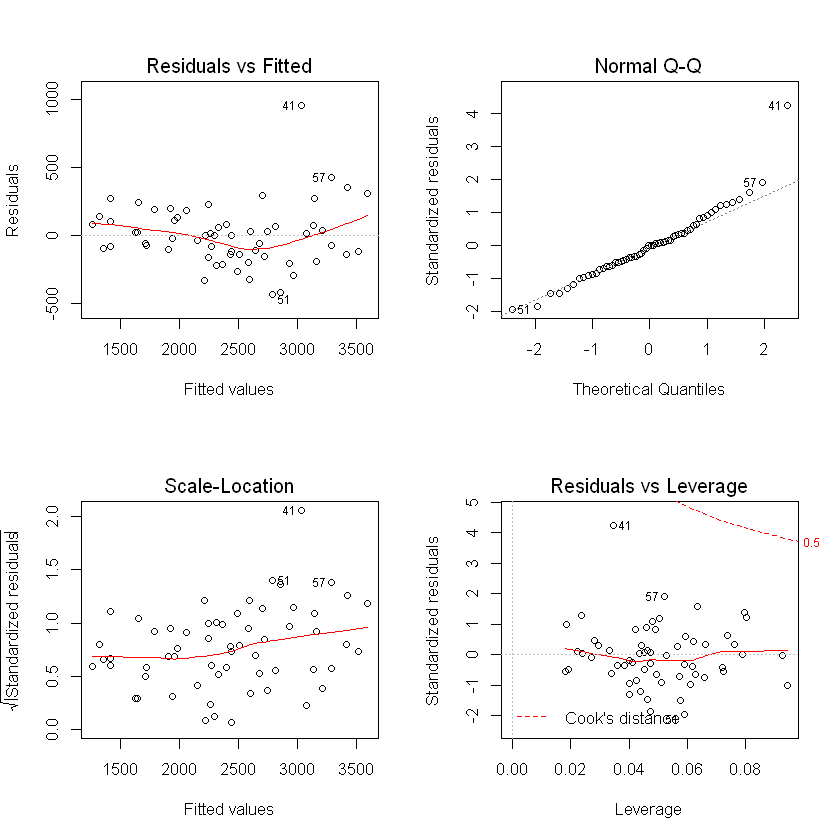

In [50]:
par(mfrow = c(2,2))
plot(a)

In [51]:
cor(tea_data$SALEDAY, tea_data$QTY)

[1] 0.6670658

In [52]:
a = lm(QTY ~ SALEDAY, data = tea_data)
summary(a)


Call:
lm(formula = QTY ~ SALEDAY, data = tea_data)

Residuals:
   Min     1Q Median     3Q    Max 
-923.2 -438.4  138.2  315.9 1232.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.550e+02  2.794e+02   1.986   0.0517 .  
SALEDAY     1.022e-02  1.499e-03   6.819  5.9e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 489.6 on 58 degrees of freedom
Multiple R-squared:  0.445,	Adjusted R-squared:  0.4354 
F-statistic:  46.5 on 1 and 58 DF,  p-value: 5.896e-09


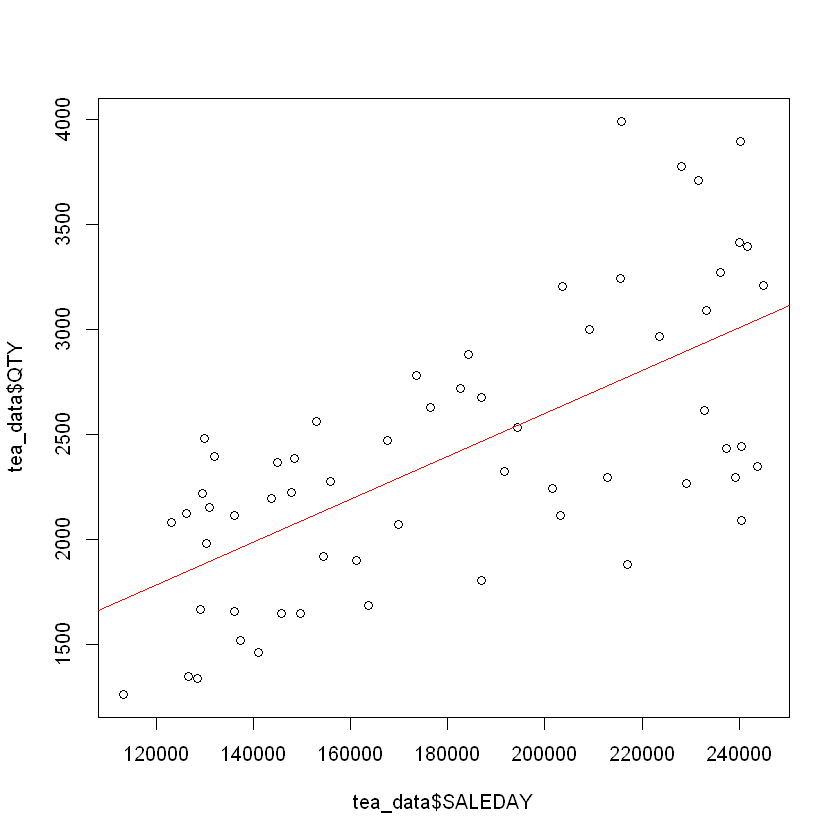

In [53]:
plot(tea_data$SALEDAY, tea_data$QTY)
abline(a, col = 2)

In [54]:
# 차음료 최종 모델
a = lm(QTY ~ MAXTEMP + SALEDAY, data = tea_data)
summary(a)


Call:
lm(formula = QTY ~ MAXTEMP + SALEDAY, data = tea_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-436.25 -138.38   -2.52  102.12  957.39 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.705e+02  1.409e+02   -1.21    0.231    
MAXTEMP      4.407e+01  3.078e+00   14.32   <2e-16 ***
SALEDAY      9.957e-03  7.054e-04   14.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.4 on 57 degrees of freedom
Multiple R-squared:  0.8793,	Adjusted R-squared:  0.875 
F-statistic: 207.6 on 2 and 57 DF,  p-value: < 2.2e-16


# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

# 비타민 음료 모델 정의

In [55]:
leaps = regsubsets(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY, data = vitamin_data, nbest = 5)
summary(leaps)

Subset selection object
Call: regsubsets.formula(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + 
    RAIN_DAY + HOLIDAY, data = vitamin_data, nbest = 5)
7 Variables  (and intercept)
         Forced in Forced out
YM           FALSE      FALSE
ITEM_CNT     FALSE      FALSE
PRICE        FALSE      FALSE
MAXTEMP      FALSE      FALSE
SALEDAY      FALSE      FALSE
RAIN_DAY     FALSE      FALSE
HOLIDAY      FALSE      FALSE
5 subsets of each size up to 7
Selection Algorithm: exhaustive
         YM  ITEM_CNT PRICE MAXTEMP SALEDAY RAIN_DAY HOLIDAY
1  ( 1 ) " " "*"      " "   " "     " "     " "      " "    
1  ( 2 ) " " " "      "*"   " "     " "     " "      " "    
1  ( 3 ) " " " "      " "   " "     "*"     " "      " "    
1  ( 4 ) "*" " "      " "   " "     " "     " "      " "    
1  ( 5 ) " " " "      " "   " "     " "     "*"      " "    
2  ( 1 ) " " " "      "*"   "*"     " "     " "      " "    
2  ( 2 ) " " "*"      " "   " "     " "     "*"      " "    
2  ( 3 ) " " "*"      " 

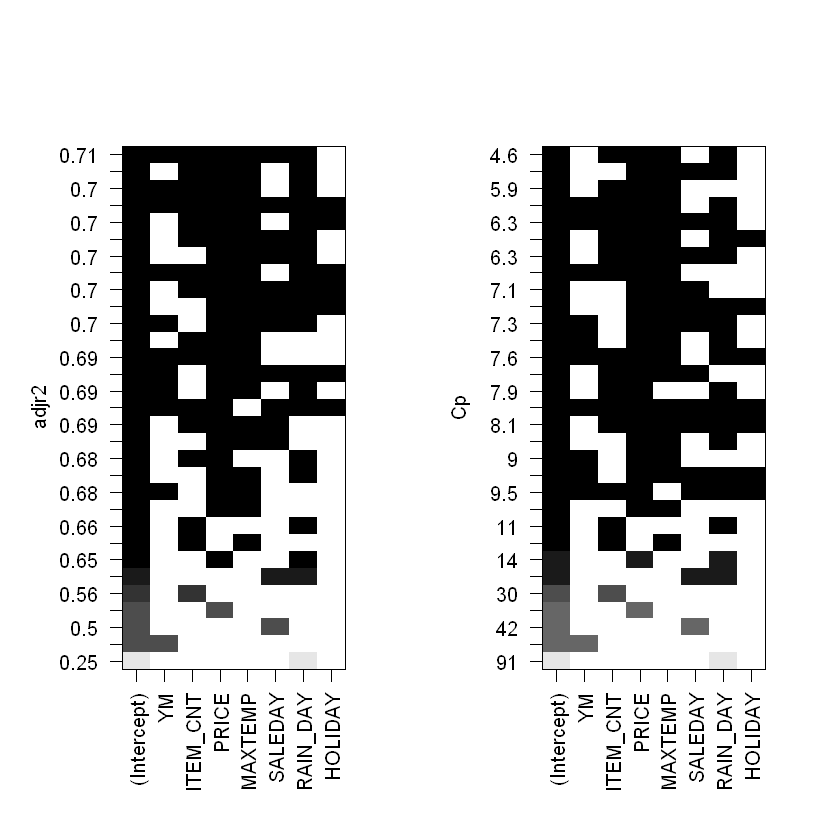

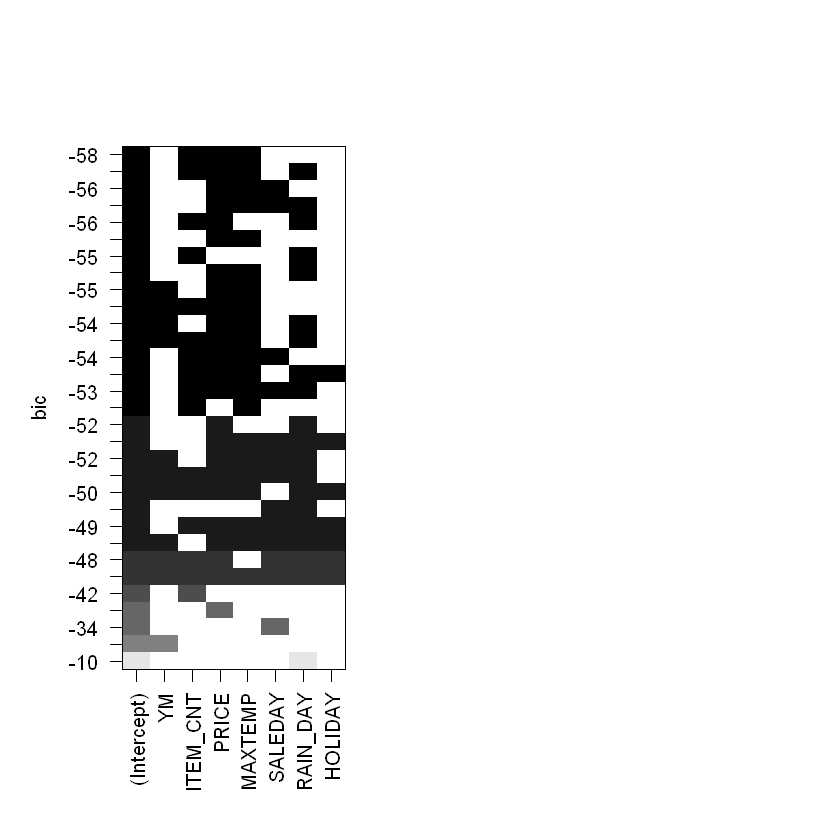

In [56]:
par(mfrow = c(1, 2))
plot(leaps, scale = 'adjr2')
plot(leaps, scale = 'Cp')
plot(leaps, scale = 'bic')

In [161]:
a = lm(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY, vitamin_data)
summary(a)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + 
    RAIN_DAY, data = vitamin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-441.99 -122.10  -19.42   74.28  552.37 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.943e+05  2.040e+05   1.443  0.15489   
YM          -1.473e+00  1.017e+00  -1.449  0.15333   
ITEM_CNT     3.406e+01  1.929e+01   1.766  0.08312 . 
PRICE        7.551e-01  2.547e-01   2.964  0.00454 **
MAXTEMP      7.608e+00  3.926e+00   1.938  0.05798 . 
SALEDAY      3.064e-03  2.389e-03   1.283  0.20521   
RAIN_DAY     6.821e-03  3.684e-03   1.851  0.06968 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 202.3 on 53 degrees of freedom
Multiple R-squared:  0.7369,	Adjusted R-squared:  0.7072 
F-statistic: 24.74 on 6 and 53 DF,  p-value: 9.355e-14


In [162]:
a = lm(QTY ~ ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY, vitamin_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY, data = vitamin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-422.62 -112.66  -43.05  107.77  574.78 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.054e+03  3.653e+02  -2.885  0.00558 **
ITEM_CNT     2.246e+01  8.909e+00   2.521  0.01462 * 
PRICE        6.854e-01  2.487e-01   2.756  0.00792 **
MAXTEMP      8.875e+00  3.825e+00   2.320  0.02406 * 
RAIN_DAY     6.731e-03  3.692e-03   1.823  0.07374 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 202.9 on 55 degrees of freedom
Multiple R-squared:  0.7254,	Adjusted R-squared:  0.7054 
F-statistic: 36.31 on 4 and 55 DF,  p-value: 7.716e-15


In [165]:
a = lm(QTY ~ ITEM_CNT + PRICE + MAXTEMP, vitamin_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + PRICE + MAXTEMP, data = vitamin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-443.02 -114.74  -45.85  131.54  592.32 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1188.2848   365.0736  -3.255  0.00193 ** 
ITEM_CNT       23.0316     9.0860   2.535  0.01407 *  
PRICE           0.7479     0.2514   2.975  0.00432 ** 
MAXTEMP        13.6824     2.8273   4.839 1.06e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207.1 on 56 degrees of freedom
Multiple R-squared:  0.7088,	Adjusted R-squared:  0.6932 
F-statistic: 45.43 on 3 and 56 DF,  p-value: 5.119e-15


In [60]:
cor(vitamin_data$PRICE, vitamin_data$QTY)

[1] 0.7210504

In [61]:
a = lm(QTY ~ PRICE, vitamin_data)
summary(a)


Call:
lm(formula = QTY ~ PRICE, data = vitamin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-510.73 -179.44    1.86   82.30  881.14 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1596.0629   275.6055  -5.791 3.00e-07 ***
PRICE           1.2671     0.1599   7.925 8.17e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 261.2 on 58 degrees of freedom
Multiple R-squared:  0.5199,	Adjusted R-squared:  0.5116 
F-statistic: 62.81 on 1 and 58 DF,  p-value: 8.17e-11


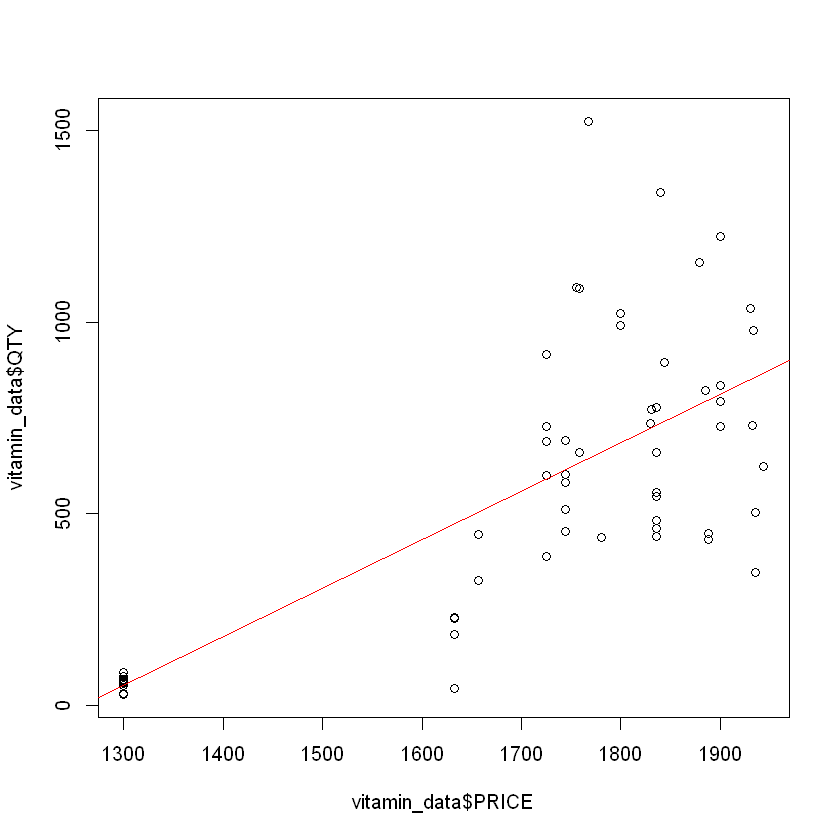

In [62]:
plot(vitamin_data$PRICE, vitamin_data$QTY)
abline(a, col = 2)

In [63]:
vitamin_data

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
61,200901,비타민음료,1,27,1300,4,126753,151,12
62,200902,비타민음료,2,29,1300,9,113399,3014,8
63,200903,비타민음료,2,67,1300,12,129162,1383,9
64,200904,비타민음료,2,60,1300,19,126277,3564,8
65,200905,비타민음료,2,74,1300,25,129584,9288,12
66,200906,비타민음료,2,84,1300,27,123218,9998,8
67,200907,비타민음료,2,61,1300,28,131083,17405,8
68,200908,비타민음료,2,63,1300,29,130040,7704,10
69,200909,비타민음료,2,56,1300,27,131989,4096,8
70,200910,비타민음료,2,50,1300,22,136095,2824,10


In [64]:
vitamin_data_new = vitamin_data %>%
    filter(PRICE != '1300')

In [65]:
a = lm(QTY ~ ITEM_CNT + PRICE + MAXTEMP, vitamin_data_new)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + PRICE + MAXTEMP, data = vitamin_data_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-369.03 -145.86  -42.01  187.27  443.93 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 466.6399   904.6961   0.516  0.60852    
ITEM_CNT     33.3261    10.8076   3.084  0.00349 ** 
PRICE        -0.2581     0.5557  -0.465  0.64449    
MAXTEMP      16.0747     3.1519   5.100 6.59e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 213.7 on 45 degrees of freedom
Multiple R-squared:  0.5569,	Adjusted R-squared:  0.5274 
F-statistic: 18.86 on 3 and 45 DF,  p-value: 4.584e-08


In [66]:
cor(vitamin_data_new$PRICE, vitamin_data_new$QTY)

[1] 0.3845897

In [67]:
a = lm(QTY ~ PRICE, vitamin_data_new)
summary(a)


Call:
lm(formula = QTY ~ PRICE, data = vitamin_data_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-516.55 -219.36  -23.44  143.09  883.76 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1687.4818   832.6529  -2.027  0.04839 * 
PRICE           1.3173     0.4612   2.856  0.00636 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 290 on 47 degrees of freedom
Multiple R-squared:  0.1479,	Adjusted R-squared:  0.1298 
F-statistic: 8.158 on 1 and 47 DF,  p-value: 0.006363


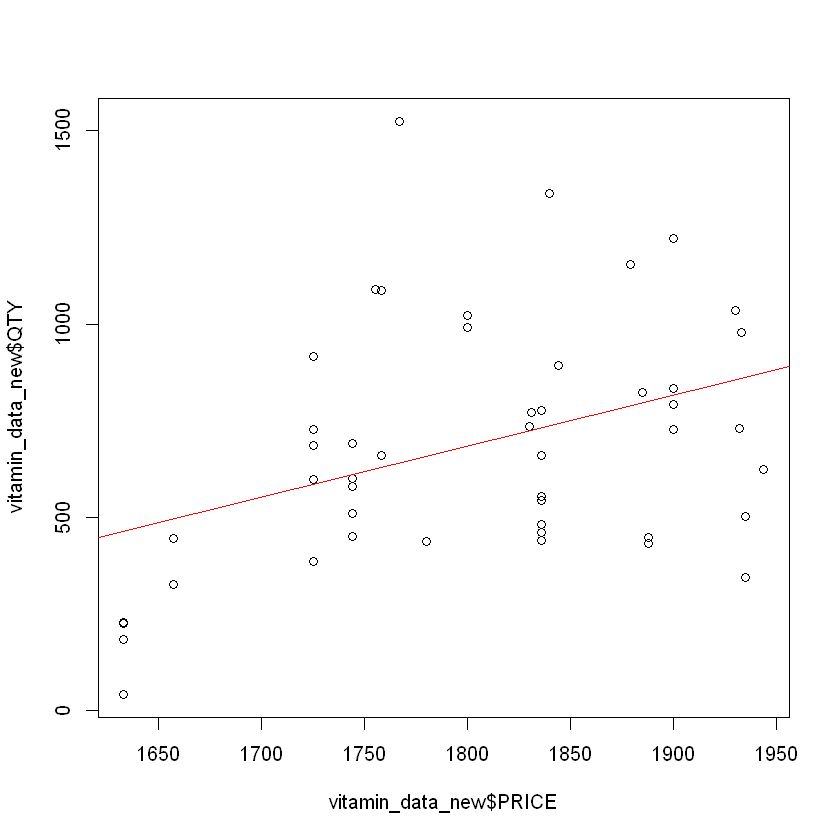

In [68]:
plot(vitamin_data_new$PRICE, vitamin_data_new$QTY)
abline(a, col = 2)

In [69]:
a = lm(QTY ~ ITEM_CNT + MAXTEMP, vitamin_data_new)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP, data = vitamin_data_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-371.83 -152.35  -31.18  193.39  487.03 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   48.652     93.642   0.520    0.606    
ITEM_CNT      29.370      6.599   4.451 5.40e-05 ***
MAXTEMP       16.154      3.120   5.177 4.84e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 211.9 on 46 degrees of freedom
Multiple R-squared:  0.5548,	Adjusted R-squared:  0.5355 
F-statistic: 28.66 on 2 and 46 DF,  p-value: 8.251e-09


In [70]:
cor(vitamin_data$ITEM_CNT, vitamin_data$QTY)

[1] 0.7515737

In [71]:
a = lm(QTY ~ ITEM_CNT, vitamin_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT, data = vitamin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-682.90 -122.66  -48.14  104.46  548.48 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   74.376     65.705   1.132    0.262    
ITEM_CNT      47.676      5.495   8.677 4.54e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 248.7 on 58 degrees of freedom
Multiple R-squared:  0.5649,	Adjusted R-squared:  0.5574 
F-statistic: 75.29 on 1 and 58 DF,  p-value: 4.541e-12


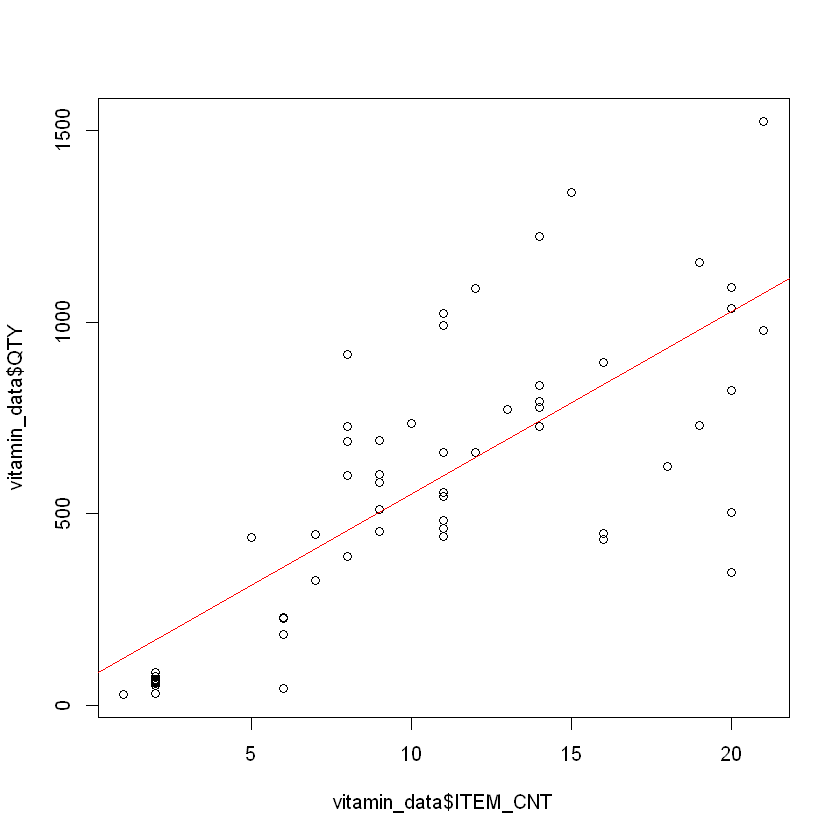

In [72]:
plot(vitamin_data$ITEM_CNT, vitamin_data$QTY)
abline(a, col = 2)

In [73]:
# 비타민 최종 모델
a = lm(QTY ~ ITEM_CNT + MAXTEMP, vitamin_data_new)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP, data = vitamin_data_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-371.83 -152.35  -31.18  193.39  487.03 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   48.652     93.642   0.520    0.606    
ITEM_CNT      29.370      6.599   4.451 5.40e-05 ***
MAXTEMP       16.154      3.120   5.177 4.84e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 211.9 on 46 degrees of freedom
Multiple R-squared:  0.5548,	Adjusted R-squared:  0.5355 
F-statistic: 28.66 on 2 and 46 DF,  p-value: 8.251e-09


## ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

# 모델 정리

In [74]:
# 과즙음료 최종 모델
a = lm(QTY ~ ITEM_CNT + MAXTEMP, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-524.38 -163.69  -32.57  162.39  725.28 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -933.680    247.168  -3.778  0.00038 ***
ITEM_CNT      35.727      3.810   9.378 3.76e-13 ***
MAXTEMP       42.019      3.819  11.004 1.01e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 284.3 on 57 degrees of freedom
Multiple R-squared:  0.8034,	Adjusted R-squared:  0.7965 
F-statistic: 116.5 on 2 and 57 DF,  p-value: < 2.2e-16


Subset selection object
Call: regsubsets.formula(QTY ~ ITEM_CNT + MAXTEMP, data = fruit_data, 
    nbest = 5)
2 Variables  (and intercept)
         Forced in Forced out
ITEM_CNT     FALSE      FALSE
MAXTEMP      FALSE      FALSE
5 subsets of each size up to 2
Selection Algorithm: exhaustive
         ITEM_CNT MAXTEMP
1  ( 1 ) " "      "*"    
1  ( 2 ) "*"      " "    
2  ( 1 ) "*"      "*"    

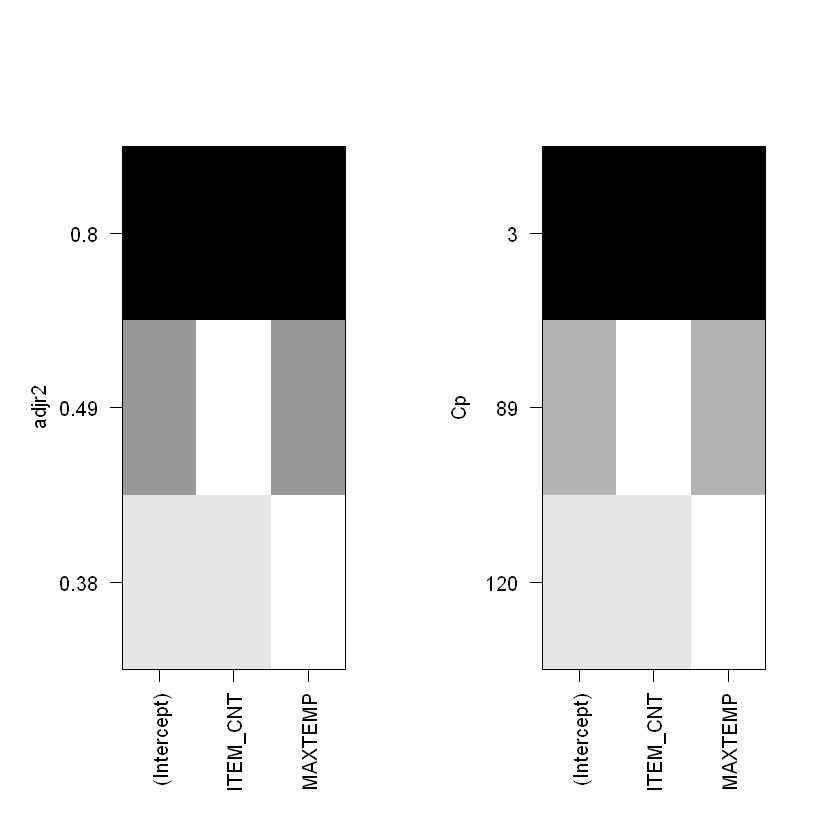

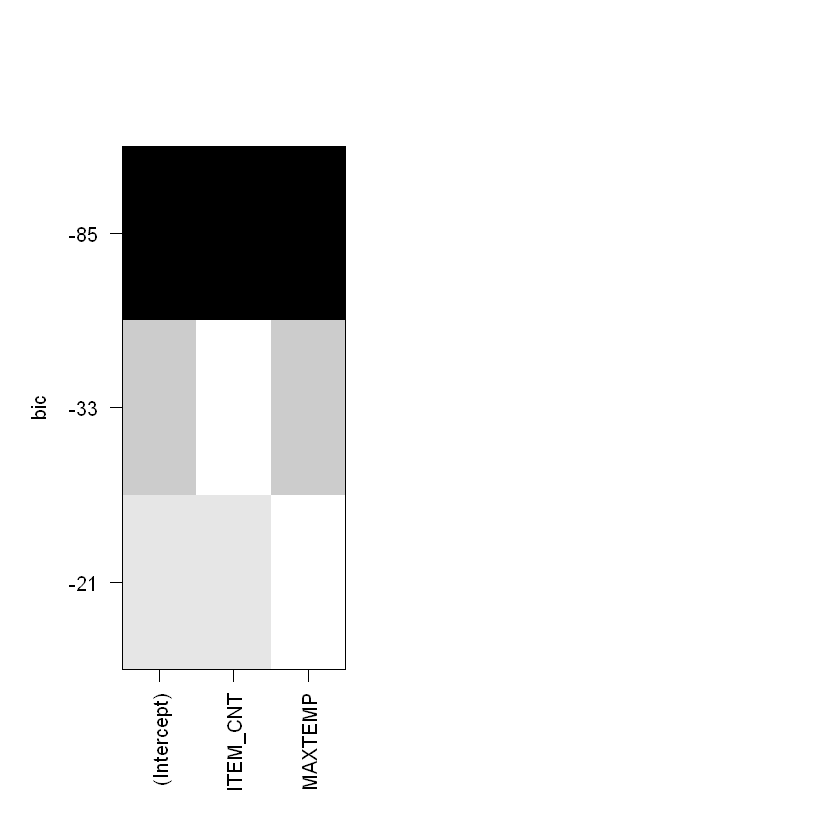

In [75]:
leaps = regsubsets(QTY ~ ITEM_CNT + MAXTEMP, data = fruit_data, nbest = 5)
summary(leaps)

par(mfrow = c(1, 2))
plot(leaps, scale = 'adjr2')
plot(leaps, scale = 'Cp')
plot(leaps, scale = 'bic')

In [76]:
# 차음료 최종 모델
a = lm(QTY ~ MAXTEMP + SALEDAY, data = tea_data)
summary(a)


Call:
lm(formula = QTY ~ MAXTEMP + SALEDAY, data = tea_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-436.25 -138.38   -2.52  102.12  957.39 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.705e+02  1.409e+02   -1.21    0.231    
MAXTEMP      4.407e+01  3.078e+00   14.32   <2e-16 ***
SALEDAY      9.957e-03  7.054e-04   14.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.4 on 57 degrees of freedom
Multiple R-squared:  0.8793,	Adjusted R-squared:  0.875 
F-statistic: 207.6 on 2 and 57 DF,  p-value: < 2.2e-16


In [77]:
# 비타민 최종 모델
a = lm(QTY ~ ITEM_CNT + MAXTEMP, vitamin_data_new)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP, data = vitamin_data_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-371.83 -152.35  -31.18  193.39  487.03 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   48.652     93.642   0.520    0.606    
ITEM_CNT      29.370      6.599   4.451 5.40e-05 ***
MAXTEMP       16.154      3.120   5.177 4.84e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 211.9 on 46 degrees of freedom
Multiple R-squared:  0.5548,	Adjusted R-squared:  0.5355 
F-statistic: 28.66 on 2 and 46 DF,  p-value: 8.251e-09


In [78]:
fruit_data_2009 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2009', YM))
fruit_data_2010 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2010', YM))
fruit_data_2011 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2011', YM))
fruit_data_2012 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2012', YM))
fruit_data_2013 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2013', YM))

fruit_data_2009

YM,MAXTEMP,QTY
200901,4,990
200902,9,1199
200903,12,1102
200904,19,1326
200905,25,1672
200906,27,1875
200907,28,1663
200908,29,1957
200909,27,2021
200910,22,1718


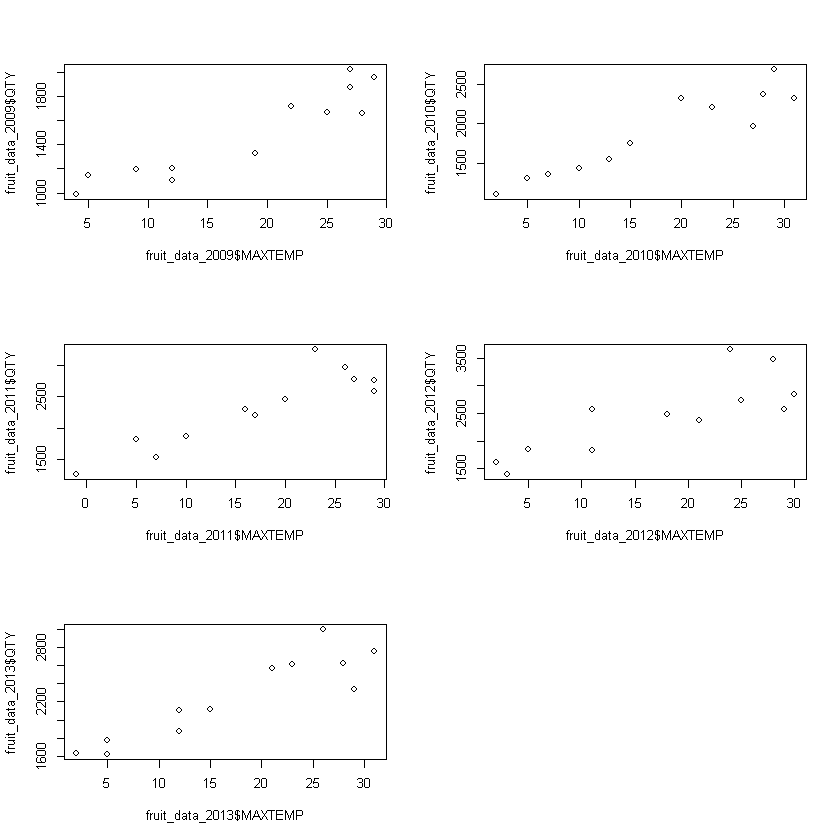

In [79]:
par(mfrow = c(3,2))
plot(fruit_data_2009$MAXTEMP, fruit_data_2009$QTY)
plot(fruit_data_2010$MAXTEMP, fruit_data_2010$QTY)
plot(fruit_data_2011$MAXTEMP, fruit_data_2011$QTY)
plot(fruit_data_2012$MAXTEMP, fruit_data_2012$QTY)
plot(fruit_data_2013$MAXTEMP, fruit_data_2013$QTY)

In [80]:
vitamin_data_2009 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2009', YM))
vitamin_data_2010 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2010', YM))
vitamin_data_2011 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2011', YM))
vitamin_data_2012 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2012', YM))
vitamin_data_2013 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2013', YM))

vitamin_data_2009$YM = seq(1:12)
vitamin_data_2010$YM = seq(1:12)
vitamin_data_2011$YM = seq(1:12)
vitamin_data_2012$YM = seq(1:12)
vitamin_data_2013$YM = seq(1:12)

vitamin_data_t = data.frame(vitamin_data_2009$YM, vitamin_data_2009$MAXTEMP)
vitamin_data_t = cbind(vitamin_data_t, vitamin_data_2010$MAXTEMP, vitamin_data_2011$MAXTEMP, vitamin_data_2012$MAXTEMP,
                       vitamin_data_2013$MAXTEMP)
vitamin_data_t$t_mean = apply(vitamin_data_t[-c(1)], 1, mean)

vitamin_data_ = data.frame(vitamin_data_2009$YM, vitamin_data_2009$QTY)
vitamin_data_ = cbind(vitamin_data_, vitamin_data_2010$QTY, vitamin_data_2011$QTY, vitamin_data_2012$QTY, vitamin_data_2013$QTY)

vitamin_data_$mean = apply(vitamin_data_[-c(1)], 1, mean)
vitamin_data_ = cbind(vitamin_data_, vitamin_data_t$t_mean)
colnames(vitamin_data_) = c('M', 'y09', 'y10', 'y11', 'y12', 'y13', 'QTY_mean', 'Temp_mean')

vitamin_data_

M,y09,y10,y11,y12,y13,QTY_mean,Temp_mean
1,27,226,581,481,432,349.4,2.0
2,29,185,691,441,447,358.6,6.6
3,67,229,452,545,623,383.2,11.0
4,60,326,511,659,1089,529.0,16.8
5,74,445,660,771,1524,694.8,23.6
6,84,438,1088,776,978,672.8,27.6
7,61,387,992,893,1036,673.8,28.8
8,63,599,1022,1338,1155,835.4,30.0
9,56,728,991,792,822,677.8,26.2
10,50,916,734,1222,730,730.4,20.8


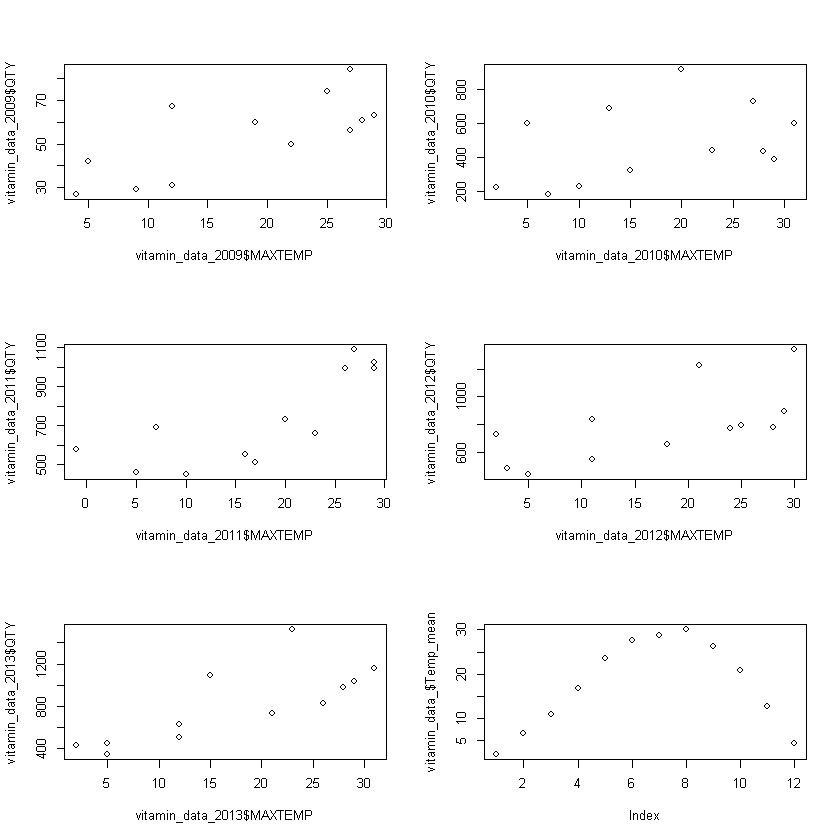

In [81]:
par(mfrow = c(3, 2))
plot(vitamin_data_2009$MAXTEMP, vitamin_data_2009$QTY)
plot(vitamin_data_2010$MAXTEMP, vitamin_data_2010$QTY)
plot(vitamin_data_2011$MAXTEMP, vitamin_data_2011$QTY)
plot(vitamin_data_2012$MAXTEMP, vitamin_data_2012$QTY)
plot(vitamin_data_2013$MAXTEMP, vitamin_data_2013$QTY)
plot(vitamin_data_$Temp_mean)

In [82]:
tea_data_2009 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2009', YM))
tea_data_2010 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2010', YM))
tea_data_2011 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2011', YM))
tea_data_2012 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2012', YM))
tea_data_2013 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2013', YM))

tea_data_2009$YM = seq(1:12)
tea_data_2010$YM = seq(1:12)
tea_data_2011$YM = seq(1:12)
tea_data_2012$YM = seq(1:12)
tea_data_2013$YM = seq(1:12)

tea_data_t = data.frame(tea_data_2009$YM, tea_data_2009$MAXTEMP)
tea_data_t = cbind(tea_data_t, tea_data_2010$MAXTEMP, tea_data_2011$MAXTEMP, tea_data_2012$MAXTEMP, tea_data_2013$MAXTEMP)
tea_data_t$t_mean = apply(tea_data_t[-c(1)], 1, mean)

tea_data_ = data.frame(tea_data_2009$YM, tea_data_2009$QTY)
tea_data_ = cbind(tea_data_, tea_data_2010$QTY, tea_data_2011$QTY, tea_data_2012$QTY, tea_data_2013$QTY)

tea_data_$mean = apply(tea_data_[-c(1)], 1, mean)
tea_data_ = cbind(tea_data_, tea_data_t$t_mean)
colnames(tea_data_) = c('M', 'y09', 'y10', 'y11', 'y12', 'y13', 'QTY_mean', 'Temp_mean')

tea_data_

M,y09,y10,y11,y12,y13,QTY_mean,Temp_mean
1,1346,1463,1685,2115,2089,1739.6,2.0
2,1260,1336,1648,1804,1880,1585.6,6.6
3,1664,1645,2069,2297,2348,2004.6,11.0
4,2125,1979,2473,3001,2435,2402.6,16.8
5,2220,2193,2626,3992,3209,2848.0,23.6
6,2082,2366,2779,3243,3274,2748.8,27.6
7,2153,2385,2717,3206,3395,2771.2,28.8
8,2479,2561,2674,3778,3894,3077.2,30.0
9,2394,2222,2879,2965,3708,2833.6,26.2
10,2116,2276,2535,3090,3413,2686.0,20.8


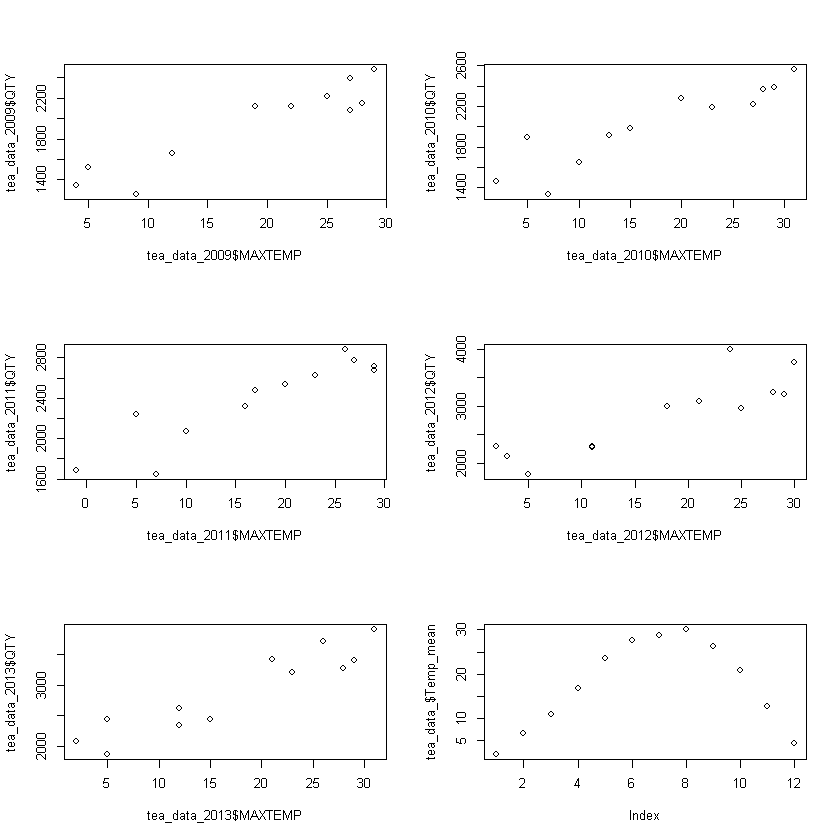

In [83]:
par(mfrow = c(3, 2))
plot(tea_data_2009$MAXTEMP, tea_data_2009$QTY)
plot(tea_data_2010$MAXTEMP, tea_data_2010$QTY)
plot(tea_data_2011$MAXTEMP, tea_data_2011$QTY)
plot(tea_data_2012$MAXTEMP, tea_data_2012$QTY)
plot(tea_data_2013$MAXTEMP, tea_data_2013$QTY)
plot(tea_data_$Temp_mean)

In [84]:
fruit_data_2009$YM = seq(1:12)
fruit_data_2010$YM = seq(1:12)
fruit_data_2011$YM = seq(1:12)
fruit_data_2012$YM = seq(1:12)
fruit_data_2013$YM = seq(1:12)

fruit_data_t = data.frame(fruit_data_2009$YM, fruit_data_2009$MAXTEMP)
fruit_data_t = cbind(fruit_data_t, fruit_data_2010$MAXTEMP, fruit_data_2011$MAXTEMP, fruit_data_2012$MAXTEMP, fruit_data_2013$MAXTEMP)
fruit_data_t$t_mean = apply(fruit_data_t[-c(1)], 1, mean)

fruit_data_ = data.frame(fruit_data_2009$YM, fruit_data_2009$QTY)
fruit_data_ = cbind(fruit_data_, fruit_data_2010$QTY, fruit_data_2011$QTY, fruit_data_2012$QTY, fruit_data_2013$QTY)

fruit_data_

fruit_data_2009.YM,fruit_data_2009.QTY,fruit_data_2010$QTY,fruit_data_2011$QTY,fruit_data_2012$QTY,fruit_data_2013$QTY
1,990,1106,1268,1402,1627
2,1199,1361,1528,1859,1624
3,1102,1432,1874,2566,2103
4,1326,1750,2200,2475,2117
5,1672,2204,3247,3653,2606
6,1875,2366,2783,3474,2621
7,1663,2681,2593,2568,2336
8,1957,2321,2765,2854,2755
9,2021,1963,2971,2744,2992
10,1718,2321,2459,2369,2563


In [85]:
fruit_data_$mean = apply(fruit_data_[-c(1)], 1, mean)
fruit_data_ = cbind(fruit_data_, fruit_data_t$t_mean)
colnames(fruit_data_) = c('M', 'y09', 'y10', 'y11', 'y12', 'y13', 'QTY_mean', 'Temp_mean')
fruit_data_

M,y09,y10,y11,y12,y13,QTY_mean,Temp_mean
1,990,1106,1268,1402,1627,1278.6,2.0
2,1199,1361,1528,1859,1624,1514.2,6.6
3,1102,1432,1874,2566,2103,1815.4,11.0
4,1326,1750,2200,2475,2117,1973.6,16.8
5,1672,2204,3247,3653,2606,2676.4,23.6
6,1875,2366,2783,3474,2621,2623.8,27.6
7,1663,2681,2593,2568,2336,2368.2,28.8
8,1957,2321,2765,2854,2755,2530.4,30.0
9,2021,1963,2971,2744,2992,2538.2,26.2
10,1718,2321,2459,2369,2563,2286.0,20.8


In [86]:
fruit_data_1 = fruit_data_[-c(2:6)]
fruit_data_1$group = 'fruit_temp'
vitamin_data_1 = vitamin_data_[-c(2:6)]
vitamin_data_1$group = 'vitamin_temp'
tea_data_1 = tea_data_[-c(2:6)]
tea_data_1$group = 'tea_temp'
data_month = rbind(fruit_data_1, vitamin_data_1, tea_data_1)
head(data_month)

M,QTY_mean,Temp_mean,group
1,1278.6,2.0,fruit_temp
2,1514.2,6.6,fruit_temp
3,1815.4,11.0,fruit_temp
4,1973.6,16.8,fruit_temp
5,2676.4,23.6,fruit_temp
6,2623.8,27.6,fruit_temp


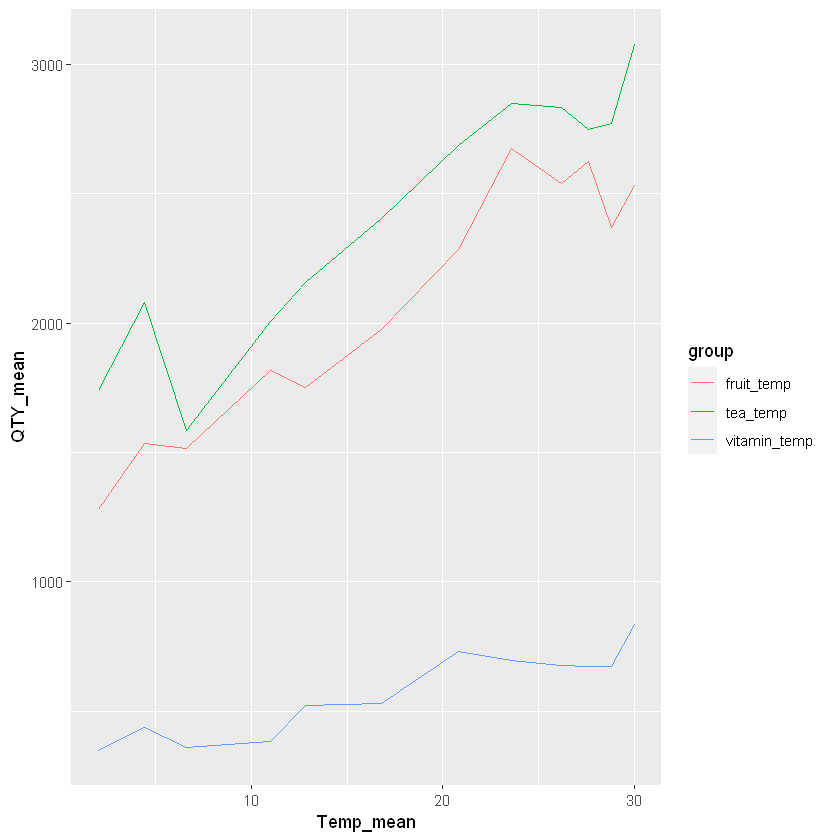

In [87]:
ggplot(data = data_month) +
    geom_line(aes(x = Temp_mean, y = QTY_mean, group = group, color = group), linetype = 1)

In [88]:
data_month = as.data.frame(data_month)
data_month$M = as.integer(data_month$M)
head(data_month)

M,QTY_mean,Temp_mean,group
1,1278.6,2.0,fruit_temp
2,1514.2,6.6,fruit_temp
3,1815.4,11.0,fruit_temp
4,1973.6,16.8,fruit_temp
5,2676.4,23.6,fruit_temp
6,2623.8,27.6,fruit_temp


In [89]:
data_month = data_month %>%
        mutate(season = ntile(data_month$Temp_mean, 4))

In [90]:
data_month$season = as.factor(data_month$season)
str(data_month)

'data.frame':	36 obs. of  5 variables:
 $ M        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ QTY_mean : num  1279 1514 1815 1974 2676 ...
 $ Temp_mean: num  2 6.6 11 16.8 23.6 27.6 28.8 30 26.2 20.8 ...
 $ group    : chr  "fruit_temp" "fruit_temp" "fruit_temp" "fruit_temp" ...
 $ season   : Factor w/ 4 levels "1","2","3","4": 1 1 2 2 3 4 4 4 3 3 ...


In [91]:
a = aov(QTY_mean ~ season * group, data = data_month)
summary(a)

             Df   Sum Sq  Mean Sq F value   Pr(>F)    
season        3  4308384  1436128  68.037 7.04e-12 ***
group         2 23013922 11506961 545.142  < 2e-16 ***
season:group  6   724583   120764   5.721 0.000826 ***
Residuals    24   506597    21108                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [92]:
TukeyHSD(a)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = QTY_mean ~ season * group, data = data_month)

$season
         diff       lwr       upr     p adj
2-1 296.06667  107.1330  485.0003 0.0012457
3-1 788.62222  599.6885  977.5559 0.0000000
4-1 825.33333  636.3997 1014.2670 0.0000000
3-2 492.55556  303.6219  681.4892 0.0000011
4-2 529.26667  340.3330  718.2003 0.0000003
4-3  36.71111 -152.2226  225.6448 0.9493752

$group
                              diff        lwr        upr    p adj
tea_temp-fruit_temp       336.8167   188.6951   484.9383 2.19e-05
vitamin_temp-fruit_temp -1502.4167 -1650.5383 -1354.2951 0.00e+00
vitamin_temp-tea_temp   -1839.2333 -1987.3549 -1691.1117 0.00e+00

$`season:group`
                                      diff         lwr        upr     p adj
2:fruit_temp-1:fruit_temp       405.066667   -22.65471   832.7880 0.0748781
3:fruit_temp-1:fruit_temp      1058.133333   630.41195  1485.8547 0.0000003
4:fruit_temp-1:fruit_temp

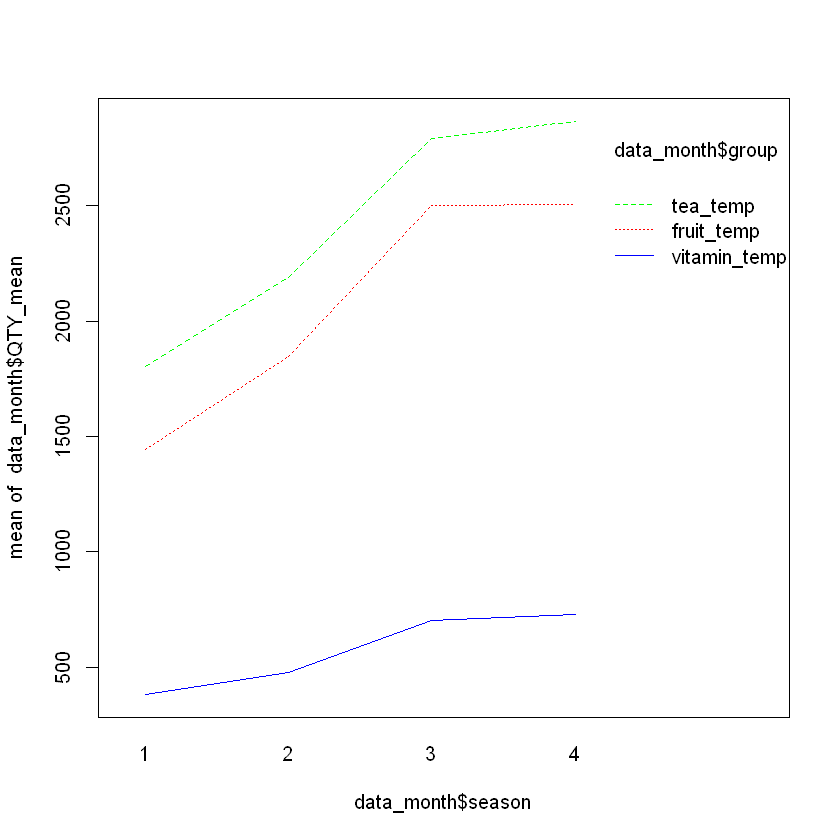

In [93]:
interaction.plot(data_month$season, data_month$group, data_month$QTY_mean, col = rainbow(3))

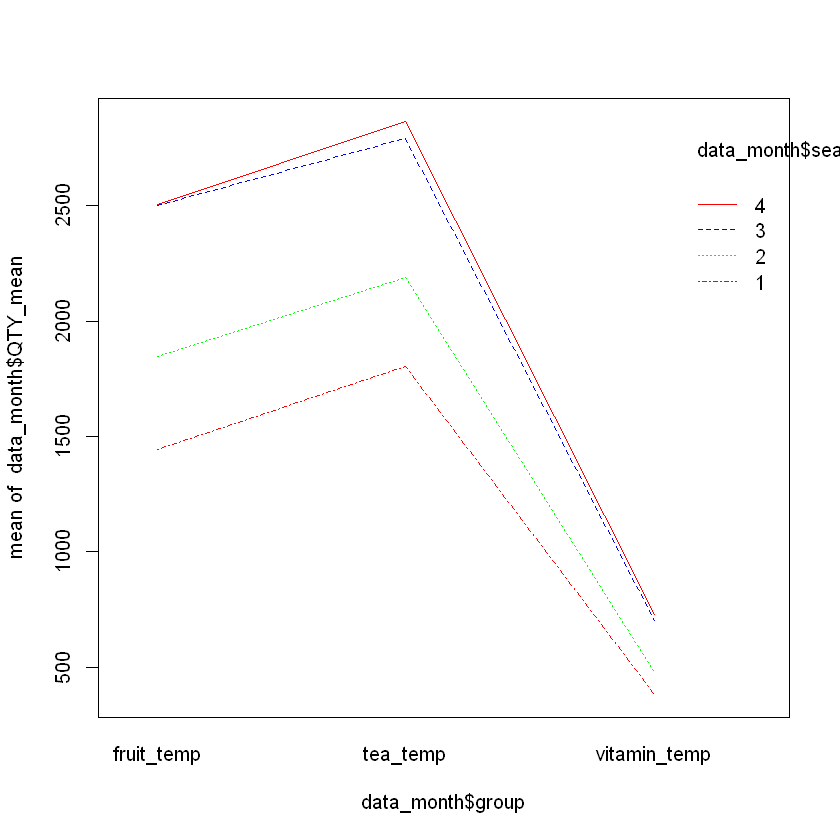

In [94]:
interaction.plot(data_month$group, data_month$season, data_month$QTY_mean, col = rainbow(3))

In [95]:
data_month

M,QTY_mean,Temp_mean,group,season
1,1278.6,2.0,fruit_temp,1
2,1514.2,6.6,fruit_temp,1
3,1815.4,11.0,fruit_temp,2
4,1973.6,16.8,fruit_temp,2
5,2676.4,23.6,fruit_temp,3
6,2623.8,27.6,fruit_temp,4
7,2368.2,28.8,fruit_temp,4
8,2530.4,30.0,fruit_temp,4
9,2538.2,26.2,fruit_temp,3
10,2286.0,20.8,fruit_temp,3


In [171]:
fruit_data_2009_month = fruit_data %>%
                    filter(grepl('^2009', YM))
fruit_data_2009_month$YM = as.factor(seq(1:12))
fruit_data_2009_month$year = 2009

fruit_data_2010_month = fruit_data %>%
                    filter(grepl('^2010', YM))
fruit_data_2010_month$YM = as.factor(seq(1:12))
fruit_data_2010_month$year = 2010

fruit_data_2011_month = fruit_data %>%
                    filter(grepl('^2011', YM))
fruit_data_2011_month$YM = as.factor(seq(1:12))
fruit_data_2011_month$year = 2011

fruit_data_2012_month = fruit_data %>%
                    filter(grepl('^2012', YM))
fruit_data_2012_month$YM = as.factor(seq(1:12))
fruit_data_2012_month$year = 2012

fruit_data_2013_month = fruit_data %>%
                    filter(grepl('^2013', YM))
fruit_data_2013_month$YM = as.factor(seq(1:12))
fruit_data_2013_month$year = 2013


fruit_data_ymonth_0912 = rbind(fruit_data_2009_month, fruit_data_2010_month, fruit_data_2011_month, fruit_data_2012_month)

In [96]:
data_2013 = data  %>% 
                filter(grepl('^2013', YM))

data_2013_fruit = data_2013  %>% 
                    filter(CATEGORY == '과즙음료')
data_2013_vitamin = data_2013  %>% 
                        filter(CATEGORY == '비타민음료')
data_2013_tea = data_2013  %>% 
                    filter(CATEGORY == '차음료')

data_0912 = data  %>% 
                filter(!grepl('^2013', YM))

data_0912_fruit = data_0912  %>% 
                    filter(CATEGORY == '과즙음료')
data_0912_vitamin = data_0912  %>% 
                    filter(CATEGORY == '비타민음료')
data_0912_vitamin = data_0912_vitamin  %>% 
                    filter(PRICE != 1300)

data_0912_tea = data_0912  %>% 
                    filter(CATEGORY == '차음료')

In [172]:
# 과즙음료 최종 모델
fruit_model = lm(QTY ~ YM + ITEM_CNT + year, data = fruit_data_ymonth_0912)
summary(fruit_model)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + year, data = fruit_data_ymonth_0912)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.83 -133.85  -43.91   97.93  455.48 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.769e+05  1.243e+05  -1.424 0.163594    
YM2          3.105e+02  1.590e+02   1.952 0.059167 .  
YM3          6.131e+02  1.596e+02   3.842 0.000509 ***
YM4          6.623e+02  1.601e+02   4.137 0.000219 ***
YM5          1.380e+03  1.613e+02   8.557 5.38e-10 ***
YM6          1.219e+03  1.660e+02   7.347 1.63e-08 ***
YM7          9.786e+02  1.655e+02   5.914 1.11e-06 ***
YM8          1.077e+03  1.655e+02   6.506 1.91e-07 ***
YM9          1.042e+03  1.646e+02   6.334 3.18e-07 ***
YM10         8.191e+02  1.655e+02   4.950 1.99e-05 ***
YM11         3.310e+02  1.650e+02   2.006 0.052882 .  
YM12         1.072e+02  1.637e+02   0.654 0.517212    
ITEM_CNT     3.054e+01  6.789e+00   4.498 7.61e-05 ***
year         8.769e+01  6.198e+01   1.415 

In [173]:
# 차음료 최종 모델
tea_model = lm(QTY ~ MAXTEMP + SALEDAY, data = data_0912_tea)
summary(tea_model)


Call:
lm(formula = QTY ~ MAXTEMP + SALEDAY, data = data_0912_tea)

Residuals:
    Min      1Q  Median      3Q     Max 
-429.01 -117.56    2.35   73.97  920.63 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.428e+02  1.556e+02  -1.561    0.126    
MAXTEMP      4.017e+01  3.147e+00  12.765   <2e-16 ***
SALEDAY      1.090e-02  8.585e-04  12.692   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 209.7 on 45 degrees of freedom
Multiple R-squared:  0.8815,	Adjusted R-squared:  0.8762 
F-statistic: 167.3 on 2 and 45 DF,  p-value: < 2.2e-16


In [174]:
# 비타민 최종 모델
vitamin_model = lm(QTY ~ ITEM_CNT + MAXTEMP, data_0912_vitamin)
summary(vitamin_model)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP, data = data_0912_vitamin)

Residuals:
    Min      1Q  Median      3Q     Max 
-268.01 -107.41  -54.55  159.06  363.94 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -168.348    107.900  -1.560 0.127970    
ITEM_CNT      61.455     10.378   5.922 1.09e-06 ***
MAXTEMP       11.439      2.979   3.840 0.000511 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 173 on 34 degrees of freedom
Multiple R-squared:  0.6611,	Adjusted R-squared:  0.6412 
F-statistic: 33.16 on 2 and 34 DF,  p-value: 1.026e-08


## 2013 과즙음료 예측

In [177]:
fruit_pre = as.data.frame(predict(fruit_model, fruit_data_2013_month, interval = 'predict'))
fruit_pre = cbind(fruit_pre, data_2013_fruit$QTY)
fruit_pre$acc[fruit_pre$'data_2013_fruit$QTY' >= fruit_pre$lwr & fruit_pre$'data_2013_fruit$QTY' <= fruit_pre$upr] = T
fruit_pre$acc[is.na(fruit_pre$acc)] = F
colnames(fruit_pre) = c('fit', 'lwr', 'upr', 'QTY', 'acc')
fruit_pre

fit,lwr,upr,QTY,acc
1509.964,929.2001,2090.728,1627,TRUE
1881.558,1313.7764,2449.340,1624,TRUE
2123.040,1552.8044,2693.275,2103,TRUE
2080.621,1463.6860,2697.556,2117,TRUE
2859.775,2248.0194,3471.530,2606,TRUE
2515.434,1833.7069,3197.161,2621,TRUE
2366.432,1711.8240,3021.040,2336,TRUE
2525.508,1886.5957,3164.420,2755,TRUE
2430.201,1779.5912,3080.811,2992,TRUE
2359.621,1742.6860,2976.556,2563,TRUE


In [178]:
round(sum(fruit_pre$acc) / dim(fruit_pre)[1], 2)

[1] 1

## 2013 차음료 예측

In [179]:
tea_pre = as.data.frame(predict(tea_model, data_2013_tea, interval = 'predict'))
tea_pre = cbind(tea_pre, data_2013_tea$QTY)
tea_pre$acc[tea_pre$'data_2013_tea$QTY' >= tea_pre$lwr & tea_pre$'data_2013_tea$QTY' <= tea_pre$upr] = T
tea_pre$acc[is.na(tea_pre$acc)] = F
colnames(tea_pre) = c('fit', 'lwr', 'upr', 'QTY', 'acc')
tea_pre

fit,lwr,upr,QTY,acc
2457.356,2000.805,2913.907,2089,TRUE
2322.853,1879.964,2765.742,1880,TRUE
2894.227,2446.027,3342.428,2348,FALSE
2945.985,2502.156,3389.815,2435,FALSE
3351.519,2903.325,3799.712,3209,TRUE
3455.493,3008.305,3902.681,3274,TRUE
3555.667,3104.991,4006.344,3395,TRUE
3619.162,3167.123,4071.201,3894,TRUE
3325.930,2882.313,3769.547,3708,TRUE
3215.755,2770.771,3660.739,3413,TRUE


In [180]:
round(sum(tea_pre$acc) / dim(tea_pre)[1], 2)

[1] 0.83

## 2013 비타민 음료 예측

In [181]:
vitamin_pre = as.data.frame(predict(vitamin_model, data_2013_vitamin, interval = 'predict'))
vitamin_pre = cbind(vitamin_pre, data_2013_vitamin$QTY)
vitamin_pre$acc[vitamin_pre$'data_2013_vitamin$QTY' >= vitamin_pre$lwr & vitamin_pre$'data_2013_vitamin$QTY' <= vitamin_pre$upr] = T
vitamin_pre$acc[is.na(vitamin_pre$acc)] = F
colnames(vitamin_pre) = c('fit', 'lwr', 'upr', 'QTY', 'acc')
vitamin_pre

fit,lwr,upr,QTY,acc
837.8060,442.3751,1233.237,432,FALSE
872.1218,481.9783,1262.265,447,FALSE
1075.1016,677.6437,1472.560,623,FALSE
1232.3270,818.0091,1646.645,1089,TRUE
1385.2906,965.3553,1805.226,1524,TRUE
1442.4836,1023.1879,1861.779,978,FALSE
1392.4675,983.1952,1801.740,1036,TRUE
1353.8899,953.0299,1754.750,1155,TRUE
1358.1516,949.2691,1767.034,822,FALSE
1239.5038,839.4351,1639.573,730,FALSE


In [182]:
round(sum(vitamin_pre$acc) / dim(vitamin_pre)[1], 2)

[1] 0.33

# 전체

In [108]:
pred = rbind(fruit_pre, vitamin_pre, tea_pre)
round(sum(pred$acc) / dim(pred)[1], 2)

[1] 0.69

# 전체 회귀분석

In [109]:
a = lm(QTY ~ ITEM_CNT + PRICE + MAXTEMP + SALEDAY, data_0912)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + PRICE + MAXTEMP + SALEDAY, data = data_0912)

Residuals:
    Min      1Q  Median      3Q     Max 
-874.00 -203.80   23.28  198.29 1328.68 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -89.345121 170.153881  -0.525      0.6    
ITEM_CNT     39.902972   1.537457  25.954  < 2e-16 ***
PRICE        -0.643810   0.056907 -11.313  < 2e-16 ***
MAXTEMP      27.486726   3.002391   9.155 6.23e-16 ***
SALEDAY       0.005507   0.000833   6.611 7.56e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 345.8 on 139 degrees of freedom
Multiple R-squared:  0.8739,	Adjusted R-squared:  0.8702 
F-statistic: 240.7 on 4 and 139 DF,  p-value: < 2.2e-16


In [110]:
cor(data_0912$PRICE, data_0912$QTY)

[1] 0.1904011

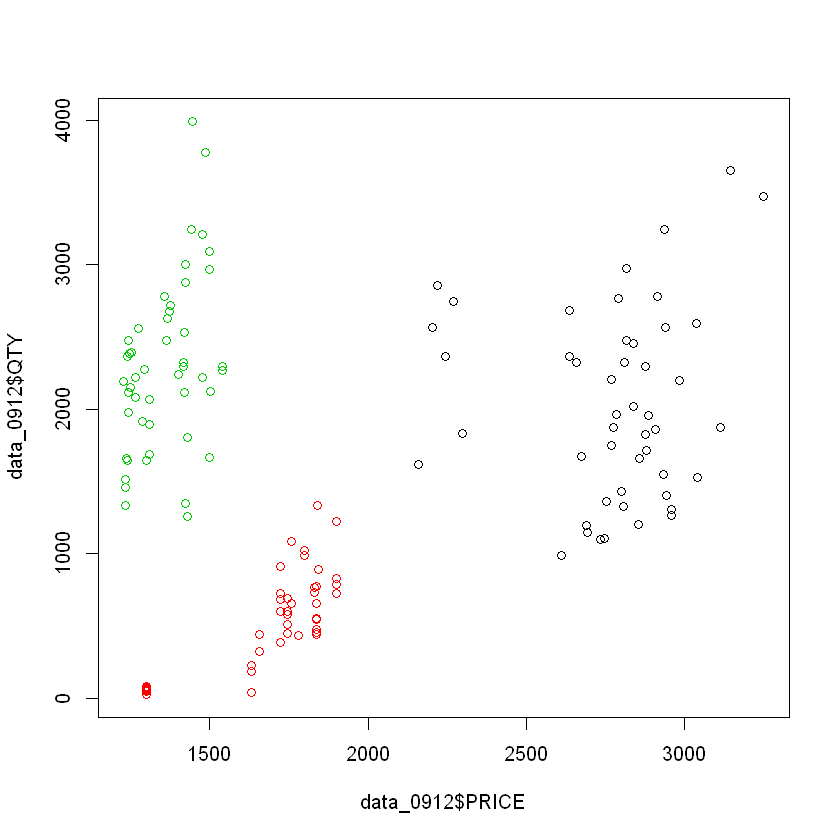

In [111]:
plot(data_0912$PRICE, data_0912$QTY, col = data_0912$CATEGORY)

In [112]:
pre = as.data.frame(predict(a, data_2013, interval = 'predict'))
pre = cbind(pre, data_2013$QTY)
pre$acc[pre$'data_2013$QTY' >= pre$lwr & pre$'data_2013$QTY' <= pre$upr] = T
pre$acc[is.na(pre$acc)] = F
pre

fit,lwr,upr,data_2013$QTY,acc
2397.4470,1693.348047,3101.546,1627,FALSE
2332.3370,1635.360411,3029.314,1624,FALSE
2566.5020,1867.463601,3265.540,2103,TRUE
2450.0912,1753.498735,3146.684,2117,TRUE
2809.0894,2110.129202,3508.050,2606,TRUE
2952.3785,2254.323911,3650.433,2621,TRUE
3146.6412,2446.179164,3847.103,2336,FALSE
3259.3920,2557.945628,3960.838,2755,TRUE
3014.1221,2317.363263,3710.881,2992,TRUE
3141.3318,2442.548128,3840.115,2563,TRUE


In [113]:
round(sum(pre$acc) / dim(pre)[1], 2)

[1] 0.81